<a href="https://colab.research.google.com/github/Rabo27/Olympic-Analysis-with-python-/blob/main/Olympics_(2%2C_Analysis_%26_Visual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ramontanoeiro_summer_olympic_medals_1986_2020_path = kagglehub.dataset_download('ramontanoeiro/summer-olympic-medals-1986-2020')

print('Data source import complete.')

Using Colab cache for faster access to the 'summer-olympic-medals-1986-2020' dataset.
Data source import complete.


<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Inrtoduction</center></h1>
</div>


The Summer Olympic Games, also known as the Games of the Olympiad, are a major international multi-sport event normally held once every four years. The Games were first held in 1896 in Athens, Greece, and were most recently the 2020 Summer Olympics held in 2021 in Tokyo, Japan.

The International Olympic Committee (IOC) organises the Games and oversees the host city's preparations. In each Olympic event, gold medals are awarded for first place, silver medals are awarded for second place, and bronze medals are awarded for third place; this tradition began in 1904.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/270px-Olympic_rings_without_rims.svg.png)

The Olympics have increased in scope from a 42 competition event programme with fewer than 250 male competitors from 14 nations in 1896 to 306 events with 11,238 competitors (6,179 men, 5,059 women) from 206 nations in 2016.

The Games have been held four times in the United States (1904, 1932, 1984, and 1996), three times in Great Britain (1908, 1948, and 2012), twice each in Greece (1896 and 2004), France (1900 and 1924), Germany (1936 and 1972), Australia (1956 and 2000), and Japan (1964 and 2020) and once each in Sweden (1912), Belgium (1920), Netherlands (1928), Finland (1952), Italy (1960), Mexico (1968), Canada (1976), Soviet Union (1980), South Korea (1988), Spain (1992), China (2008), and Brazil (2016).

The 2024 Summer Olympics will be held in Paris, France for a third time, exactly one hundred years after the city's last Summer Olympics in 1924. The IOC has also selected Los Angeles, California to host its third Summer Games in 2028, and Brisbane, Queensland, to host Australia’s third Olympics in 2032.



<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Importing libraries</center></h1>
</div>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Importing and Reading the dataset</center></h1>
</div>

In [ ]:
medals = pd.read_csv('/content/Country_Medals.csv', encoding= 'unicode_escape')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Country_Medals.csv'

In [ ]:
medals.head()

Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze
0  1932;(USA);United States;Los Angeles;United St...                      
1  1932;(ITA);Italy;Los Angeles;United States;12;...                      
2  1932;(FRA);France;Los Angeles;United States;10...                      
3  1932;(SWE);Sweden;Los Angeles;United States;9;5;9                      
4   1932;(JPN);Japan;Los Angeles;United States;7;7;4

In [ ]:
medals.shape

(1344, 1)

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Cleaning and managing the dataset</center></h1>
</div>

In [ ]:
medals = medals.rename(columns = {'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze': 'all_data'}, inplace = False)

In [ ]:
medals.head()

all_data
0  1932;(USA);United States;Los Angeles;United St...
1  1932;(ITA);Italy;Los Angeles;United States;12;...
2  1932;(FRA);France;Los Angeles;United States;10...
3  1932;(SWE);Sweden;Los Angeles;United States;9;5;9
4   1932;(JPN);Japan;Los Angeles;United States;7;7;4

In [ ]:
'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze'.split(';')

['Year',
 'Country_Code',
 'Country_Name',
 'Host_city',
 'Host_country',
 'Gold',
 'Silver',
 'Bronze']

In [ ]:
'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze'.split(';')[0]

'Year'

In [ ]:
def year(x):
    return x.split(';')[0]

def Country_Code(x):
    return x.split(';')[1]

def Country_Name(x):
    return x.split(';')[2]

def Host_city(x):
    return x.split(';')[3]

def Host_country(x):
    return x.split(';')[4]

def Gold(x):
    return x.split(';')[5]

def Silver(x):
    return x.split(';')[6]

def Bronze(x):
    return x.split(';')[7]

In [ ]:
medals['year']=medals['all_data'].apply(year)
medals['Country_Code']=medals['all_data'].apply(Country_Code)
medals['Country_Name']=medals['all_data'].apply(Country_Name)
medals['Host_city']=medals['all_data'].apply(Host_city)
medals['Host_country']=medals['all_data'].apply(Host_country)
medals['Gold']=medals['all_data'].apply(Gold)
medals['Silver']=medals['all_data'].apply(Silver)
medals['Bronze']=medals['all_data'].apply(Bronze)

In [ ]:
medals.head()

all_data  year Country_Code  \
0  1932;(USA);United States;Los Angeles;United St...  1932        (USA)   
1  1932;(ITA);Italy;Los Angeles;United States;12;...  1932        (ITA)   
2  1932;(FRA);France;Los Angeles;United States;10...  1932        (FRA)   
3  1932;(SWE);Sweden;Los Angeles;United States;9;5;9  1932        (SWE)   
4   1932;(JPN);Japan;Los Angeles;United States;7;7;4  1932        (JPN)   

    Country_Name    Host_city   Host_country Gold Silver Bronze  
0  United States  Los Angeles  United States   41     32     30  
1          Italy  Los Angeles  United States   12     12     12  
2         France  Los Angeles  United States   10      5      4  
3         Sweden  Los Angeles  United States    9      5      9  
4          Japan  Los Angeles  United States    7      7      4

In [ ]:
medals=medals.drop(['all_data'],axis=1)

In [ ]:
medals.head()

year Country_Code   Country_Name    Host_city   Host_country Gold Silver  \
0  1932        (USA)  United States  Los Angeles  United States   41     32   
1  1932        (ITA)          Italy  Los Angeles  United States   12     12   
2  1932        (FRA)         France  Los Angeles  United States   10      5   
3  1932        (SWE)         Sweden  Los Angeles  United States    9      5   
4  1932        (JPN)          Japan  Los Angeles  United States    7      7   

  Bronze  
0     30  
1     12  
2      4  
3      9  
4      4

In [ ]:
medals.tail()

year Country_Code Country_Name Host_city Host_country Gold Silver Bronze
1339  1936        (MEX)       Mexico    Berlin      Germany    0      0      3
1340  1936        (BEL)      Belgium    Berlin      Germany    0      0      2
1341  1936        (AUS)    Australia    Berlin      Germany    0      0      1
1342  1936        (PHI)  Philippines    Berlin      Germany    0      0      1
1343  1936        (POR)     Portugal    Berlin      Germany    0      0      1

In [ ]:
medals.shape

(1344, 8)

In [ ]:
medals.dtypes

year            object
Country_Code    object
Country_Name    object
Host_city       object
Host_country    object
Gold            object
Silver          object
Bronze          object
dtype: object

In [ ]:
medals['Gold']=medals['Gold'].astype(int)
medals['Silver']=medals['Silver'].astype(int)
medals['Bronze']=medals['Bronze'].astype(int)
medals['Total']=medals['Gold']+medals['Silver']+medals['Bronze']

In [ ]:
medals.dtypes

year            object
Country_Code    object
Country_Name    object
Host_city       object
Host_country    object
Gold             int64
Silver           int64
Bronze           int64
Total            int64
dtype: object

In [ ]:
medals['Country_Name'].unique()

array(['United States', 'Italy', 'France', 'Sweden', 'Japan', 'Hungary',
       'Finland', 'Great Britain', 'Germany', 'Australia', 'Argentina',
       'Canada', 'Netherlands', 'Poland', 'South Africa', 'Ireland',
       'Czechoslovakia', 'Austria', 'India', 'Denmark', 'Mexico',
       'Latvia', 'New Zealand', 'Switzerland', 'Philippines', 'Spain',
       'Uruguay', 'Estonia', 'Egypt', 'Norway', 'Yugoslavia', 'Belgium',
       'Chile', 'Haiti', 'Portugal', 'Romania', 'Brazil', 'Greece',
       'Luxembourg', 'Australasia', 'Russian Empire', 'Bohemia', 'Cuba',
       'Mixed team', 'West Germany', 'China', 'South Korea', 'Morocco',
       'Kenya', 'Pakistan', 'Jamaica', 'Nigeria', 'Puerto Rico',
       'Colombia', 'Ivory Coast', 'Peru', 'Syria', 'Thailand', 'Turkey',
       'Venezuela', 'Algeria', 'Cameroon', 'Chinese Taipei',
       'Dominican Republic', 'Iceland', 'Zambia', 'Soviet Union',
       'East Germany', 'Bulgaria', 'Ethiopia', 'Zimbabwe', 'North Korea',
       'Mongolia', 'Tanz

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Countries with the most medals</center></h1>
</div>


In [ ]:
medals.groupby('Country_Name')['year'].count().sort_values(ascending=False).head(10)

Country_Name
Great Britain    29
France           29
Denmark          28
United States    28
Switzerland      28
Hungary          27
Italy            27
Sweden           27
Australia        27
Canada           27
Name: year, dtype: int64

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Countries with the least medals</center></h1>
</div>


In [ ]:
medals.groupby('Country_Name')['year'].count().sort_values(ascending=False).tail(25)

Country_Name
Iraq                                1
Eritrea                             1
Djibouti                            1
Cyprus                              1
Gabon                               1
Guatemala                           1
Guyana                              1
Independent Olympic Athletes        1
Independent Olympic Participants    1
Senegal                             1
Serbia and Montenegro               1
Samoa                               1
San Marino                          1
ROC                                 1
Netherlands Antilles                1
North Macedonia                     1
Paraguay                            1
Tonga                               1
Togo                                1
Tanzania                            1
Sri Lanka                           1
Sudan                               1
Unified Team                        1
Turkmenistan                        1
Virgin Islands                      1
Name: year, dtype: int64

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>United States medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='United States'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
181   1896         Greece    11       7       2     20
161   1900         France    19      14      15     48
147   1904  United States    76      78      77    231
129   1908  Great Britain    23      12      12     47
109   1912         Sweden    26      19      19     64
87    1920        Belgium    41      27      27     95
60    1924         France    45      27      27     99
27    1928    Netherlands    22      18      16     56
0     1932  United States    41      32      30    103
1313  1936        Germany    24      20      12     56
1275  1948  Great Britain    38      27      19     84
1232  1952        Finland    40      19      17     76
1195  1956                   32      25      17     74
450   1960          Italy    34      21      16     71
408   1964          Japan    36      26      28     90
364   1968         Mexico    45      28      34    107
317   1972   West Germany    33      31      30     94
277   1976         Canada    34      35      25     94
192   1984  United States    83      61      30    174
1144  1988    South Korea    36      31      27     94
1079  1992          Spain    37      34      37    108
999   1996  United States    44      32      25    101
919   2000      Australia    37      24      32     93
845   2004         Greece    36      39      26    101
759   2008          China    36      39      37    112
672   2012  Great Britain    46      28      30    104
586   2016         Brazil    46      37      38    121
493   2020          Japan    39      41      33    113

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for United States in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='United States'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year   Host_country  Gold  Silver  Bronze  Total
147  1904  United States    76      78      77    231

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for United States in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='United States'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year Host_country  Gold  Silver  Bronze  Total
181  1896       Greece    11       7       2     20

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>France medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='France'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
184   1896         Greece     5       4       2     11
160   1900         France    27      38      37    102
159   1904  United States     0       1       0      1
131   1908  Great Britain     5       5       9     19
113   1912         Sweden     7       5       3     15
94    1920        Belgium     9      19      13     41
62    1924         France    13      15      10     38
33    1928    Netherlands     6      10       5     21
2     1932  United States    10       5       4     19
1317  1936        Germany     7       6       6     19
1277  1948  Great Britain    10       6      13     29
1238  1952        Finland     6       6       6     18
1204  1956                    4       4       6     14
473   1960          Italy     0       2       3      5
428   1964          Japan     1       8       6     15
369   1968         Mexico     7       3       5     15
332   1972   West Germany     2       4       7     13
289   1976         Canada     2       3       4      9
246   1980   Soviet Union     6       5       3     14
203   1984  United States     5       7      16     28
1150  1988    South Korea     6       4       6     16
1086  1992          Spain     8       5      16     29
1003  1996  United States    15       7      15     37
924   2000      Australia    13      14      11     38
851   2004         Greece    11       9      13     33
767   2008          China     7      16      20     43
678   2012  Great Britain    11      11      13     35
592   2016         Brazil    10      18      14     42
500   2020          Japan    10      12      11     33

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for France in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='France'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year Host_country  Gold  Silver  Bronze  Total
160  1900       France    27      38      37    102

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for France in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='France'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year   Host_country  Gold  Silver  Bronze  Total
159  1904  United States     0       1       0      1

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Italy medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='Italy'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
167   1900         France     3       2       0      5
136   1908  Great Britain     2       2       0      4
115   1912         Sweden     5       1       2      8
93    1920        Belgium    13       5       5     23
64    1924         France     8       3       5     16
31    1928    Netherlands     7       5       7     19
1     1932  United States    12      12      12     36
1315  1936        Germany     8       9       5     22
1279  1948  Great Britain     8      11       8     27
1236  1952        Finland     8       9       4     21
1198  1956                    8       8       9     25
451   1960          Italy    13      10      13     36
412   1964          Japan    10      10       7     27
376   1968         Mexico     3       4       9     16
325   1972   West Germany     5       3      10     18
288   1976         Canada     2       7       4     13
243   1980   Soviet Union     8       3       4     15
196   1984  United States    14       6      12     32
1151  1988    South Korea     6       4       4     14
1089  1992          Spain     6       5       8     19
1004  1996  United States    13      10      12     35
925   2000      Australia    13       8      13     34
852   2004         Greece    10      11      11     32
766   2008          China     8       9      10     27
680   2012  Great Britain     8       9      11     28
594   2016         Brazil     8      12       8     28
502   2020          Japan    10      10      20     40

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for Italy in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Italy'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year Host_country  Gold  Silver  Bronze  Total
502  2020        Japan    10      10      20     40

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for Italy in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Italy'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year   Host_country  Gold  Silver  Bronze  Total
136  1908  Great Britain     2       2       0      4

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Great Britain medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='Great Britain'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
185   1896         Greece     2       3       2      7
162   1900         France    15       8       9     32
155   1904  United States     1       1       0      2
128   1908  Great Britain    56      51      39    146
111   1912         Sweden    10      15      16     41
91    1920        Belgium    14      16      13     43
63    1924         France     9      13      12     34
37    1928    Netherlands     3      10       7     20
7     1932  United States     4       7       5     16
1321  1936        Germany     4       7       3     14
1286  1948  Great Britain     3      14       6     23
1249  1952        Finland     1       2       8     11
1201  1956                    6       7      11     24
460   1960          Italy     2       6      12     20
417   1964          Japan     4      12       2     18
373   1968         Mexico     5       5       3     13
327   1972   West Germany     4       5       9     18
287   1976         Canada     3       5       5     13
247   1980   Soviet Union     5       7       9     21
202   1984  United States     5      11      21     37
1153  1988    South Korea     5      10       9     24
1090  1992          Spain     5       3      12     20
1034  1996  United States     1       8       6     15
928   2000      Australia    11      10       7     28
854   2004         Greece     9       9      12     30
761   2008          China    19      13      19     51
674   2012  Great Britain    29      17      19     65
587   2016         Brazil    27      23      17     67
496   2020          Japan    22      21      22     65

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for Great Britain in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Great Britain'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year   Host_country  Gold  Silver  Bronze  Total
128  1908  Great Britain    56      51      39    146

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for Great Britain in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Great Britain'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year   Host_country  Gold  Silver  Bronze  Total
155  1904  United States     1       1       0      2

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Soviet Union medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='Soviet Union'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year  Host_country  Gold  Silver  Bronze  Total
1233  1952       Finland    22      30      19     71
1194  1956                  37      29      32     98
449   1960         Italy    43      29      31    103
409   1964         Japan    30      31      35     96
365   1968        Mexico    29      32      30     91
316   1972  West Germany    50      27      22     99
275   1976        Canada    49      41      35    125
239   1980  Soviet Union    80      69      46    195
1142  1988   South Korea    55      31      46    132

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for Soviet Union in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Soviet Union'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year  Host_country  Gold  Silver  Bronze  Total
239  1980  Soviet Union    80      69      46    195

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for Soviet Union in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Soviet Union'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year Host_country  Gold  Silver  Bronze  Total
1233  1952      Finland    22      30      19     71

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Russia medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='Russia'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
1000  1996  United States    26      21      16     63
920   2000      Australia    32      28      29     89
847   2004         Greece    28      26      36     90
760   2008          China    24      13      23     60
675   2012  Great Britain    20      20      28     68
589   2016         Brazil    19      17      20     56

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for Russia in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Russia'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year Host_country  Gold  Silver  Bronze  Total
847  2004       Greece    28      26      36     90

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for Russia in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Russia'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year Host_country  Gold  Silver  Bronze  Total
589  2016       Brazil    19      17      20     56

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Germany medals at the Summer Olympics</center></h1>
</div>


In [ ]:
medals[medals['Country_Name']=='Germany'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['year'], ascending=True)

year   Host_country  Gold  Silver  Bronze  Total
183   1896         Greece     6       5       2     13
166   1900         France     4       3       2      9
148   1904  United States     4       5       6     15
132   1908  Great Britain     3       5       5     13
114   1912         Sweden     6      13       7     26
28    1928    Netherlands    10       7      14     31
8     1932  United States     3      12       5     20
1312  1936        Germany    33      26      30     89
1259  1952        Finland     0       7      17     24
1080  1992          Spain    33      21      28     82
1001  1996  United States    20      18      27     65
923   2000      Australia    13      17      26     56
850   2004         Greece    13      16      20     49
762   2008          China    16      11      14     41
677   2012  Great Britain    11      20      13     44
590   2016         Brazil    17      10      15     42
501   2020          Japan    10      11      16     37

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the best appearance for Germany in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Germany'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=False).head(1)

year Host_country  Gold  Silver  Bronze  Total
1312  1936      Germany    33      26      30     89

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>What is the worst appearance for Germany in the Summer Olympics?</center></h1>
</div>



In [ ]:
medals[medals['Country_Name']=='Germany'].drop(['Country_Code','Country_Name','Host_city'],axis=1).sort_values(['Total'], ascending=True).head(1)

year Host_country  Gold  Silver  Bronze  Total
166  1900       France     4       3       2      9

In [ ]:
medals.head()

year Country_Code   Country_Name    Host_city   Host_country  Gold  Silver  \
0  1932        (USA)  United States  Los Angeles  United States    41      32   
1  1932        (ITA)          Italy  Los Angeles  United States    12      12   
2  1932        (FRA)         France  Los Angeles  United States    10       5   
3  1932        (SWE)         Sweden  Los Angeles  United States     9       5   
4  1932        (JPN)          Japan  Los Angeles  United States     7       7   

   Bronze  Total  
0      30    103  
1      12     36  
2       4     19  
3       9     23  
4       4     18

In [ ]:
medals.isnull().sum()

year            0
Country_Code    0
Country_Name    0
Host_city       0
Host_country    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

In [ ]:
medals['year'].unique()

array(['1932', '1928', '1924', '1920', '1912', '1908', '1904', '1900',
       '1896', '1984', '1980', '1976', '1972', '1968', '1964', '1960',
       '2020', '2016', '2012', '2008', '2004', '2000', '1996', '1992',
       '1988', '1956', '1952', '1948', '1936'], dtype=object)

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Greece-Athens - 1896</center></h1>
</div>

The 1896 Summer Olympics (Greek: Θερινοί Ολυμπιακοί Αγώνες 1896, romanized: Therinoí Olympiakoí Agónes 1896), officially known as the Games of the I Olympiad (Greek: Αγώνες της 1ης Ολυμπιάδας, romanized: Agónes tis 1is Olympiádas) and commonly known as Athens 1896 (Greek: Αθήνα 1896),

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Athens_1896_report_cover.jpg/330px-Athens_1896_report_cover.jpg)


was the first international Olympic Games held in modern history. Organised by the International Olympic Committee (IOC), which had been created by French aristocrat Pierre de Coubertin, it was held in Athens, Greece, from 6 to 15 April 1896

Fourteen nations and 241 athletes (all males) took part in the games.
Participants were all European, or living in Europe, with the exception of the United States team.
Over 65% of the competing athletes were Greek.

In [ ]:
medals_1896=medals[medals['year']=='1896'].drop(['year','Country_Code'],axis=1)
medals_1896

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
181  United States    Athens       Greece    11       7       2     20
182         Greece    Athens       Greece    10      18      19     47
183        Germany    Athens       Greece     6       5       2     13
184         France    Athens       Greece     5       4       2     11
185  Great Britain    Athens       Greece     2       3       2      7
186        Hungary    Athens       Greece     2       1       3      6
187        Austria    Athens       Greece     2       1       2      5
188      Australia    Athens       Greece     2       0       0      2
189        Denmark    Athens       Greece     1       2       3      6
190    Switzerland    Athens       Greece     1       2       0      3
191     Mixed team    Athens       Greece     1       0       1      2

/tmp/ipython-input-1134409804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1896.sort_values(['Gold']),palette="Blues_d")


<Axes: xlabel='Gold', ylabel='Country_Name'>

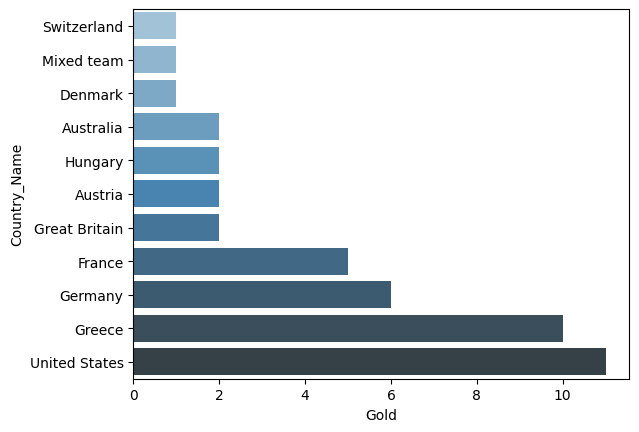

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1896.sort_values(['Gold']),palette="Blues_d")

/tmp/ipython-input-3627745785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1896.sort_values(['Silver']),palette="Blues_d")


<Axes: xlabel='Silver', ylabel='Country_Name'>

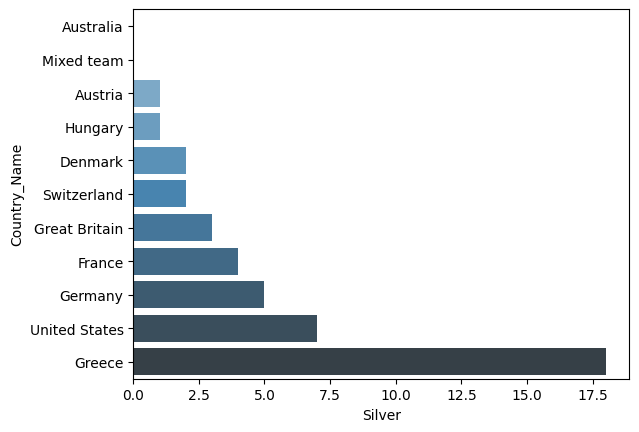

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1896.sort_values(['Silver']),palette="Blues_d")

/tmp/ipython-input-1303708403.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1896.sort_values(['Bronze']),palette="Blues_d")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

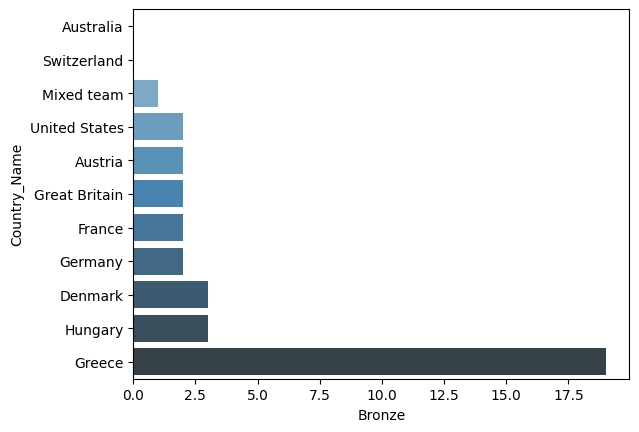

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1896.sort_values(['Bronze']),palette="Blues_d")

/tmp/ipython-input-3617417036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1896.sort_values(['Total']),palette="Blues_d")


<Axes: xlabel='Total', ylabel='Country_Name'>

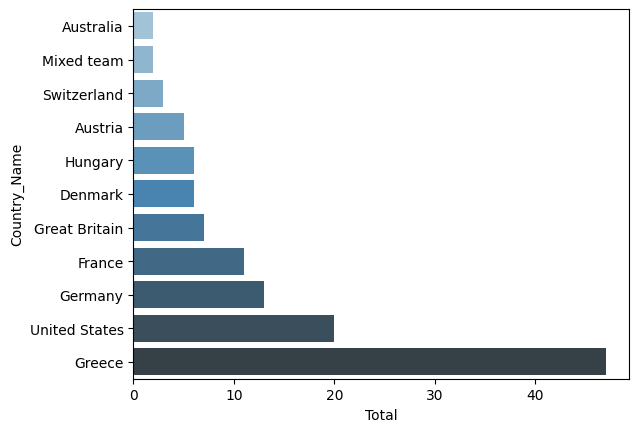

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1896.sort_values(['Total']),palette="Blues_d")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals France-Paris - 1900</center></h1>
</div>

The 1900 Summer Olympics (French: Jeux olympiques d'été de 1900), today officially known as the Games of the II Olympiad (French: Jeux de la IIe olympiade) and commonly known as Paris 1900, was an international multi-sport event that took place in Paris, France, in 1900. Competitions began on 14 May and ended on 28 October.

![summer](https://upload.wikimedia.org/wikipedia/commons/9/91/1900_Olympic_Games_Official_Postcard_Paris.jpg)

The Games were held as part of the 1900 World's Fair. In total, 997 competitors took part in 19 different sports.

Women took part in the games for the first time, with sailor Hélène de Pourtalès, born Helen Barbey in New York City, becoming the first female Olympic champion.

Most of the winners in 1900 did not receive medals, but were given cups or trophies. Professionals competed in fencing, as was tradition, and Albert Robert Ayat (France), who won the épée for amateurs and masters, was awarded a prize of 3000 francs.

The host nation of France fielded 72% of all athletes (720 of the 997) and won the most gold, silver and bronze medal placings. U.S. athletes won the second-most in each, while fielding fewer than 8% of the participants (75 of 997).

In [ ]:
medals_1900=medals[medals['year']=='1900'].drop(['year','Country_Code'],axis=1).head(10)
medals_1900

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
160         France     Paris       France    27      38      37    102
161  United States     Paris       France    19      14      15     48
162  Great Britain     Paris       France    15       8       9     32
163     Mixed team     Paris       France     8       5       6     19
164        Belgium     Paris       France     6       7       4     17
165    Switzerland     Paris       France     6       2       1      9
166        Germany     Paris       France     4       3       2      9
167          Italy     Paris       France     3       2       0      5
168      Australia     Paris       France     2       0       3      5
169        Denmark     Paris       France     1       3       2      6

/tmp/ipython-input-2601733902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Gold']),palette="Oranges")


<Axes: xlabel='Total', ylabel='Country_Name'>

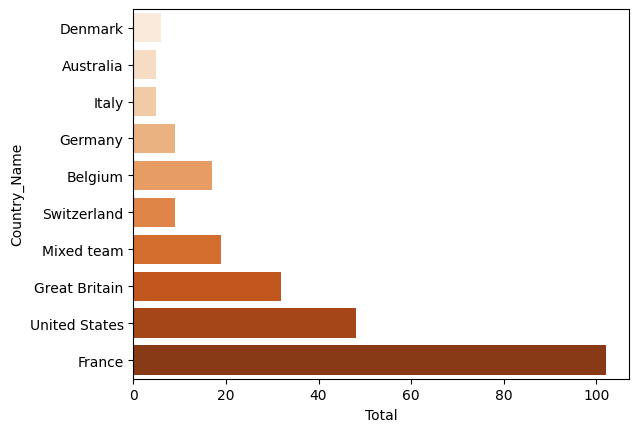

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Gold']),palette="Oranges")

/tmp/ipython-input-616311926.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Silver']),palette="Oranges")


<Axes: xlabel='Total', ylabel='Country_Name'>

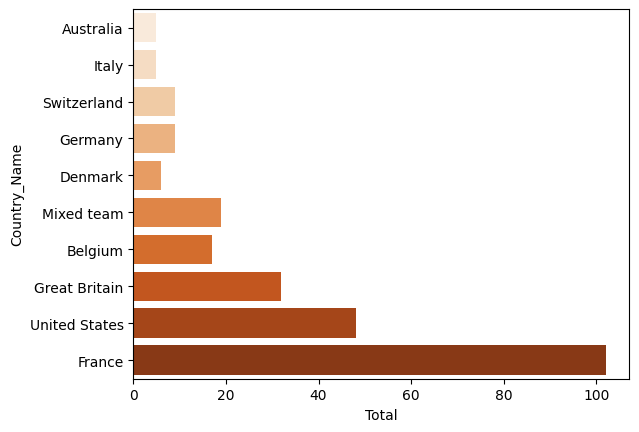

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Silver']),palette="Oranges")

/tmp/ipython-input-4115724987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Bronze']),palette="Oranges")


<Axes: xlabel='Total', ylabel='Country_Name'>

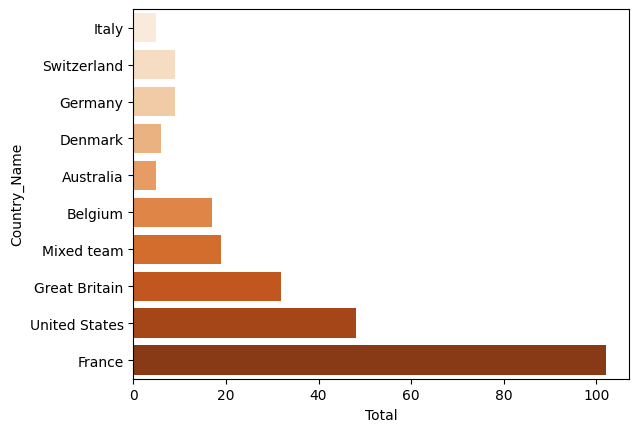

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Bronze']),palette="Oranges")

/tmp/ipython-input-3310899664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Total']),palette="Oranges")


<Axes: xlabel='Total', ylabel='Country_Name'>

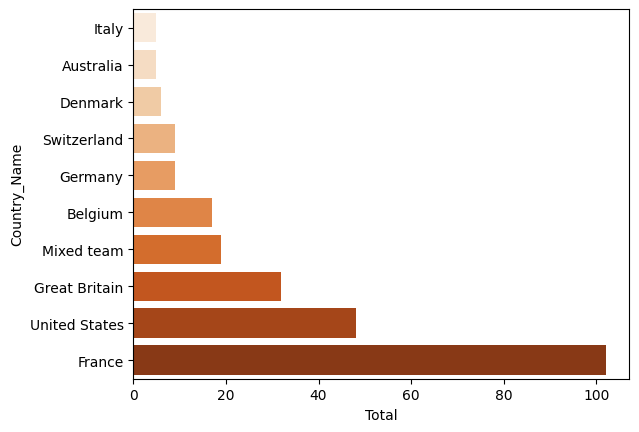

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1900.sort_values(['Total']),palette="Oranges")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals United States-St. Louis - 1904</center></h1>
</div>

The 1904 Summer Olympics, officially known as the Games of the III Olympiad and commonly known as St. Louis 1904, was an international multi-sport event which was celebrated in St. Louis, Missouri, United States, from August 29 until September 3, 1904, as part of an extended sports program lasting from July 1 to November 23, 1904, located at what is now known as Francis Field on the campus of Washington University in St. Louis. It was the first time that the Olympic Games were held outside Europe.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/1904summerolympicsposter.jpg/330px-1904summerolympicsposter.jpg)

Tensions caused by the Russo–Japanese War, and the difficulties of getting to St. Louis in 1904, contributed to very few top-class athletes from outside the US and Canada taking part in the Games.

Only 62 of the 651 athletes who competed came from outside North America, and only between 12 and 15 nations were represented in all. Some events subsequently combined the US national championship with the Olympic championship.

The current three-medal format of gold, silver, and bronze for first, second, and third place was introduced at the 1904 Olympics.

In [ ]:
medals_1904=medals[medals['year']=='1904'].drop(['year','Country_Code'],axis=1).head(10)
medals_1904

Country_Name  Host_city   Host_country  Gold  Silver  Bronze  Total
147  United States  St. Louis  United States    76      78      77    231
148        Germany  St. Louis  United States     4       5       6     15
149         Canada  St. Louis  United States     4       1       1      6
150           Cuba  St. Louis  United States     3       0       0      3
151        Hungary  St. Louis  United States     2       1       1      4
152     Mixed team  St. Louis  United States     2       1       1      4
153         Norway  St. Louis  United States     2       0       0      2
154        Austria  St. Louis  United States     1       1       1      3
155  Great Britain  St. Louis  United States     1       1       0      2
156    Switzerland  St. Louis  United States     1       0       2      3

/tmp/ipython-input-1644090620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1904.sort_values(['Gold']),palette="gray_r")


<Axes: xlabel='Gold', ylabel='Country_Name'>

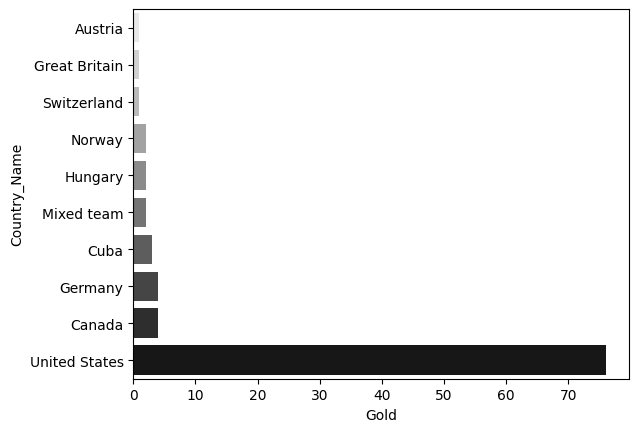

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1904.sort_values(['Gold']),palette="gray_r")

/tmp/ipython-input-4099962626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1904.sort_values(['Silver']),palette="gray_r")


<Axes: xlabel='Silver', ylabel='Country_Name'>

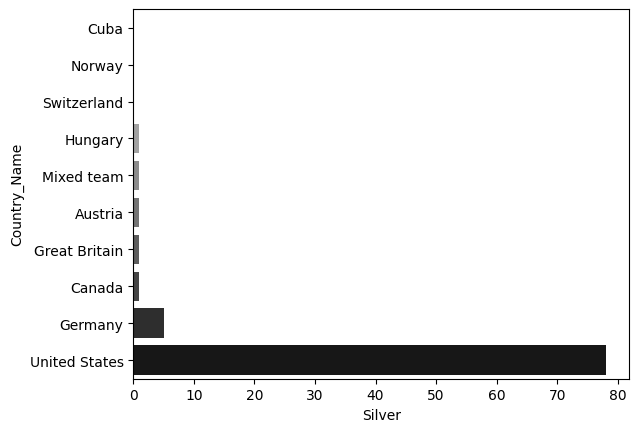

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1904.sort_values(['Silver']),palette="gray_r")

/tmp/ipython-input-2811980732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1904.sort_values(['Bronze']),palette="gray_r")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

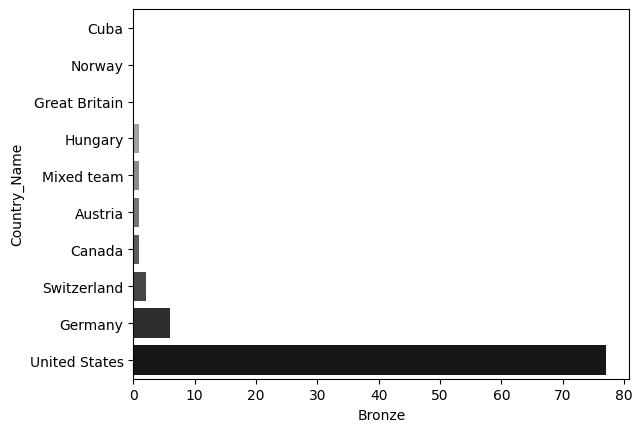

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1904.sort_values(['Bronze']),palette="gray_r")

/tmp/ipython-input-2207145678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1904.sort_values(['Total']),palette="gray_r")


<Axes: xlabel='Total', ylabel='Country_Name'>

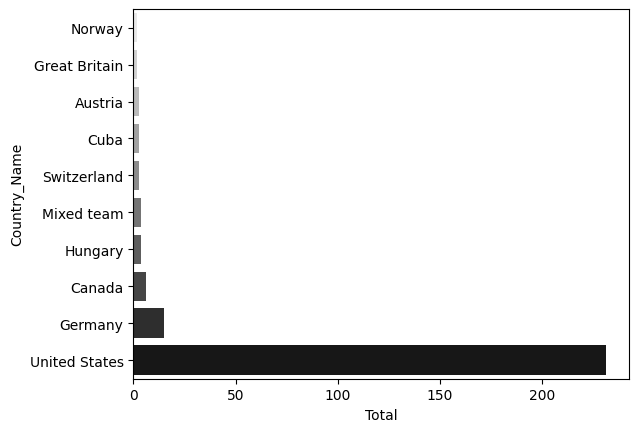

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1904.sort_values(['Total']),palette="gray_r")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Great Britain-London - 1908</center></h1>
</div>

The 1908 Summer Olympics, officially the Games of the IV Olympiad, and commonly known as London 1908, was an international multi-sport event held in London, United Kingdom, from 27 April to 31 October 1908.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Olympic_games_1908_London.jpg/330px-Olympic_games_1908_London.jpg)


The 1908 Games were originally scheduled to be held in Rome, but were relocated on financial grounds following the violent eruption of Mount Vesuvius in 1906, which claimed more than 100 lives. Rome eventually hosted the Games in 1960.

These were the fourth chronological modern Summer Olympics in keeping with the now-accepted four-year cycle as opposed to the alternate four-year cycle of the proposed Intercalated Games. The IOC president for these Games was Baron Pierre de Coubertin.

Lasting a total of 187 days (or six months and four days), these Games were the longest in modern Olympics history. The duration of the Summer Games was 16 days in 1912, ranged between 15 and 18 days from 1928 to 1992, and was fixed at 17 days from 1996.




In [ ]:
medals_1908=medals[medals['year']=='1908'].drop(['year','Country_Code'],axis=1).head(10)
medals_1908

Country_Name Host_city   Host_country  Gold  Silver  Bronze  Total
128  Great Britain    London  Great Britain    56      51      39    146
129  United States    London  Great Britain    23      12      12     47
130         Sweden    London  Great Britain     8       6      11     25
131         France    London  Great Britain     5       5       9     19
132        Germany    London  Great Britain     3       5       5     13
133        Hungary    London  Great Britain     3       4       2      9
134         Canada    London  Great Britain     3       3      10     16
135         Norway    London  Great Britain     2       3       3      8
136          Italy    London  Great Britain     2       2       0      4
137        Belgium    London  Great Britain     1       5       2      8

/tmp/ipython-input-2441270610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1908.sort_values(['Gold']),palette="winter")


<Axes: xlabel='Gold', ylabel='Country_Name'>

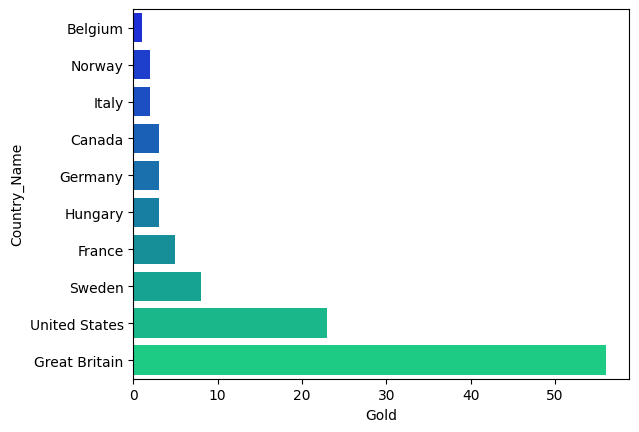

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1908.sort_values(['Gold']),palette="winter")

/tmp/ipython-input-2672733649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1908.sort_values(['Silver']),palette="winter")


<Axes: xlabel='Silver', ylabel='Country_Name'>

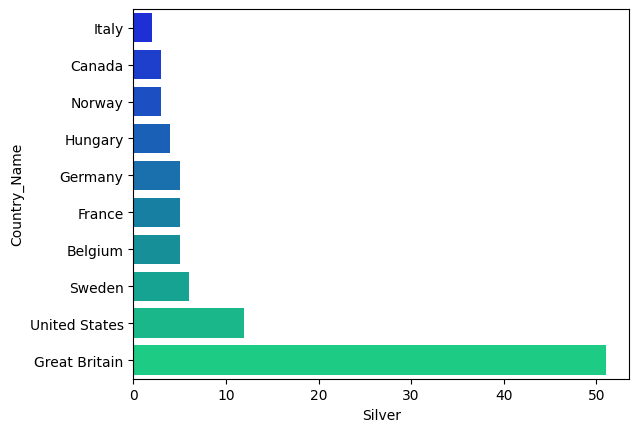

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1908.sort_values(['Silver']),palette="winter")

/tmp/ipython-input-168144020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1908.sort_values(['Bronze']),palette="winter")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

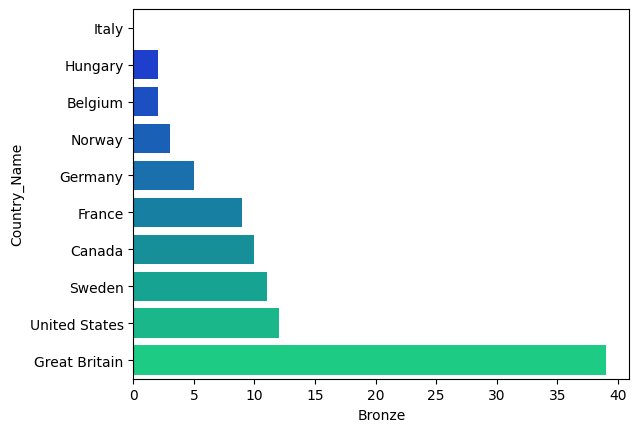

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1908.sort_values(['Bronze']),palette="winter")

/tmp/ipython-input-2520201623.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1908.sort_values(['Total']),palette="winter")


<Axes: xlabel='Total', ylabel='Country_Name'>

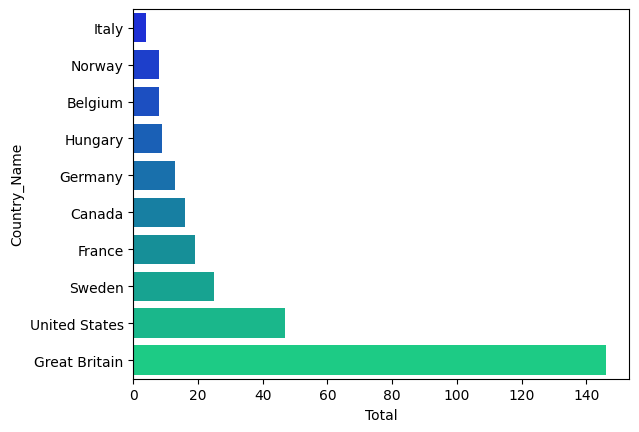

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1908.sort_values(['Total']),palette="winter")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Sweden-Stockholm - 1912</center></h1>
</div>

The 1912 Summer Olympics (Swedish: Olympiska sommarspelen 1912), officially known as the Games of the V Olympiad (Swedish: Den V olympiadens spel) and commonly known as Stockholm 1912, were an international multi-sport event held in Stockholm, Sweden, between 5 May and 22 July 1912.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/b/bd/1912_Summer_Olympics_poster.jpg/330px-1912_Summer_Olympics_poster.jpg)


Twenty-eight nations and 2,408 competitors, including 48 women, competed in 102 events in 14 sports. With the exception of tennis (starting on 5 May) and football and shooting (both starting on 29 June), the games were held within a month with an official opening on 6 July. It was the last Olympics to issue solid gold medals and, with Japan's debut, the first time an Asian nation participated. Stockholm was the only bid for the games, and was selected in 1909.

The games were the first to have art competitions, women's diving, women's swimming, and the first to feature both the decathlon and the new pentathlon, both won by Jim Thorpe. Electric timing was introduced in athletics, while the host country disallowed boxing. Figure skating was rejected by the organizers because they wanted to promote the Nordic Games. United States won the most gold medals (25), while Sweden won the most medals overall (65). These were the final Olympic Games for 8 years due to the disruption of the First World War. The next Olympic Games were held in 1920 (the Summer in Antwerp).

In [ ]:
medals_1912=medals[medals['year']=='1912'].drop(['year','Country_Code'],axis=1).head(10)
medals_1912

Country_Name  Host_city Host_country  Gold  Silver  Bronze  Total
109  United States  Stockholm       Sweden    26      19      19     64
110         Sweden  Stockholm       Sweden    24      24      17     65
111  Great Britain  Stockholm       Sweden    10      15      16     41
112        Finland  Stockholm       Sweden     9       8       9     26
113         France  Stockholm       Sweden     7       5       3     15
114        Germany  Stockholm       Sweden     6      13       7     26
115          Italy  Stockholm       Sweden     5       1       2      8
116   South Africa  Stockholm       Sweden     4       2       0      6
117         Norway  Stockholm       Sweden     4       1       5     10
118         Canada  Stockholm       Sweden     3       2       3      8

/tmp/ipython-input-497222387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1912.sort_values(['Gold']),palette="summer_r")


<Axes: xlabel='Gold', ylabel='Country_Name'>

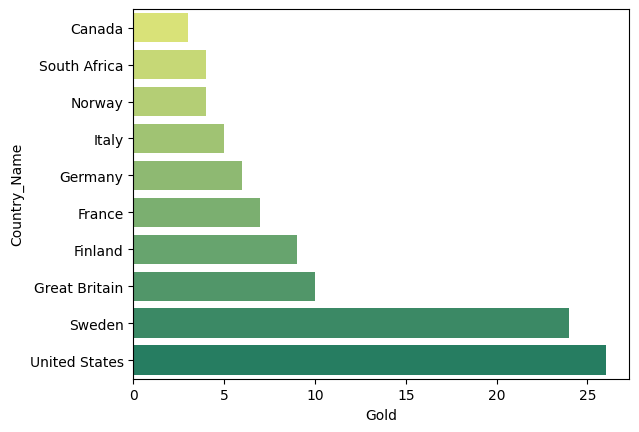

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1912.sort_values(['Gold']),palette="summer_r")

/tmp/ipython-input-454222663.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1912.sort_values(['Silver']),palette="summer_r")


<Axes: xlabel='Silver', ylabel='Country_Name'>

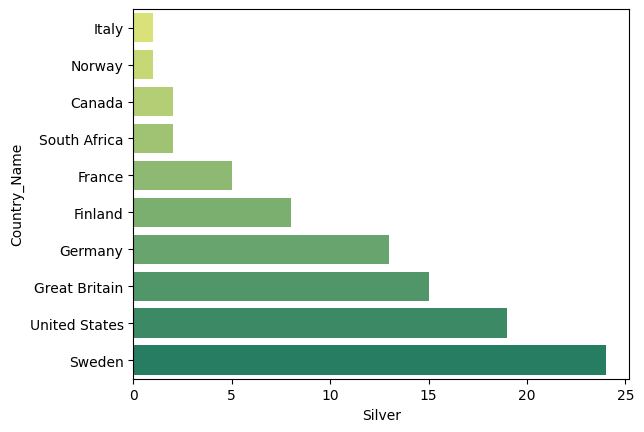

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1912.sort_values(['Silver']),palette="summer_r")

/tmp/ipython-input-2933726778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1912.sort_values(['Bronze']),palette="summer_r")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

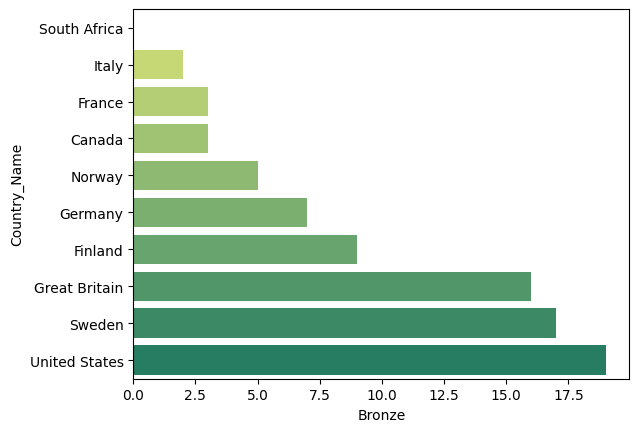

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1912.sort_values(['Bronze']),palette="summer_r")

/tmp/ipython-input-1708786003.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1912.sort_values(['Total']),palette="summer_r")


<Axes: xlabel='Total', ylabel='Country_Name'>

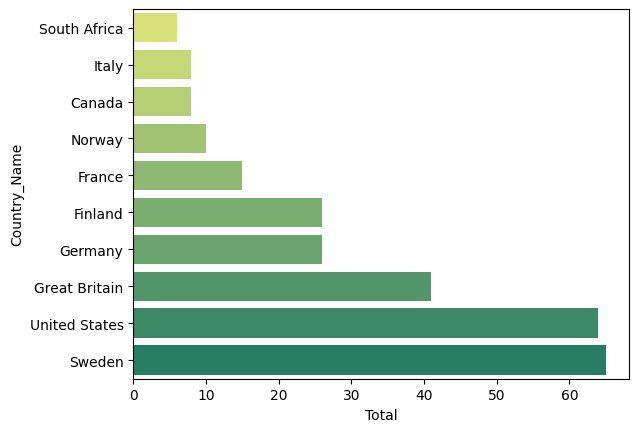

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1912.sort_values(['Total']),palette="summer_r")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Belgium-Antwerp - 1920</center></h1>
</div>

The 1920 Summer Olympics (French: Jeux olympiques d'été de 1920; Dutch: Olympische Zomerspelen van 1920; German: Olympische Sommerspiele 1920), officially known as the Games of the VII Olympiad (French: Jeux de la VIIe olympiade; Dutch: Spelen van de VIIe Olympiade; German: Spiele der VII. Olympiade) and commonly known as Antwerp 1920 (French: Anvers 1920; Dutch and German: Antwerpen 1920), were an international multi-sport event held in 1920 in Antwerp, Belgium.

![summer](https://upload.wikimedia.org/wikipedia/commons/7/73/1920_olympics_poster.jpg)

In March 1912, during the 13th session of the IOC, Belgium's bid to host the 1920 Summer Olympics was made by Baron Édouard de Laveleye, president of the Belgian Olympic Committee and of the Royal Belgian Football Association. No fixed host city was proposed at the time.

The 1916 Summer Olympics, to have been held in Berlin, capital of the German Empire, were cancelled due to World War I. When the Olympic Games resumed after the war, Antwerp was awarded hosting the 1920 Summer Games as tribute to the Belgian people. The aftermath of the war and the Paris Peace Conference, 1919 affected the Olympic Games not only due to new states being created, but also by sanctions against the nations that lost the war and were blamed for starting it. Hungary, Germany, Austria, Bulgaria, and the Ottoman Empire were banned from competing in the Games. The newly formed Soviet Union chose not to attend the Games. Germany did not return to Olympic competition until 1928 and instead hosted a series of games called Deutsche Kampfspiele, starting with the Winter edition of 1922 (which predated the first Winter Olympics).

The United States won the most gold and overall medals.

The sailing events were held in Ostend, Belgium, and two in Amsterdam, Netherlands.

In [ ]:
medals_1920=medals[medals['year']=='1920'].drop(['year','Country_Code'],axis=1).head(10)
medals_1920

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
87  United States   Antwerp      Belgium    41      27      27     95
88         Sweden   Antwerp      Belgium    19      20      25     64
89        Belgium   Antwerp      Belgium    16      12      14     42
90        Finland   Antwerp      Belgium    15      10       9     34
91  Great Britain   Antwerp      Belgium    14      16      13     43
92         Norway   Antwerp      Belgium    13       9       9     31
93          Italy   Antwerp      Belgium    13       5       5     23
94         France   Antwerp      Belgium     9      19      13     41
95    Netherlands   Antwerp      Belgium     4       2       5     11
96        Denmark   Antwerp      Belgium     3       9       1     13

/tmp/ipython-input-65748320.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1920.sort_values(['Gold']),palette="BuPu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

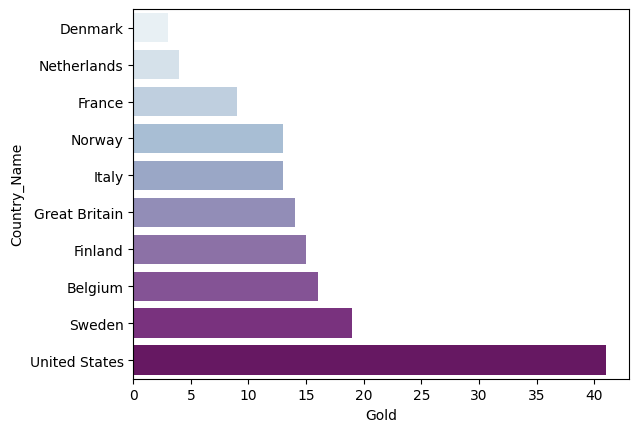

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1920.sort_values(['Gold']),palette="BuPu")

/tmp/ipython-input-3109835290.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1920.sort_values(['Silver']),palette="BuPu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

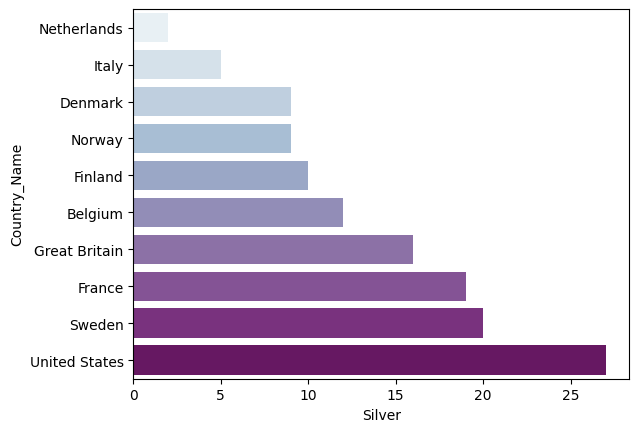

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1920.sort_values(['Silver']),palette="BuPu")

/tmp/ipython-input-2871511572.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1920.sort_values(['Bronze']),palette="BuPu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

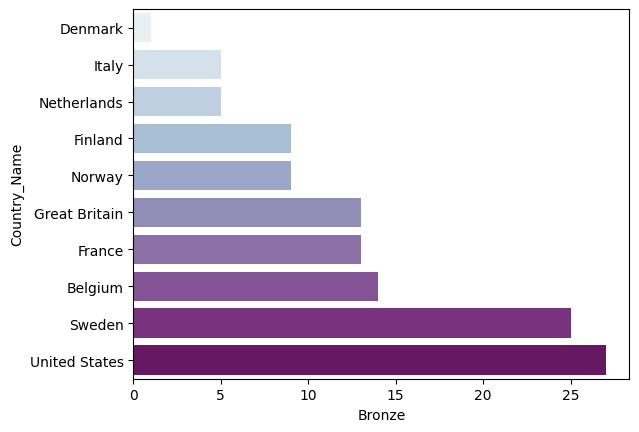

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1920.sort_values(['Bronze']),palette="BuPu")

/tmp/ipython-input-3370211849.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1920.sort_values(['Total']),palette="BuPu")


<Axes: xlabel='Total', ylabel='Country_Name'>

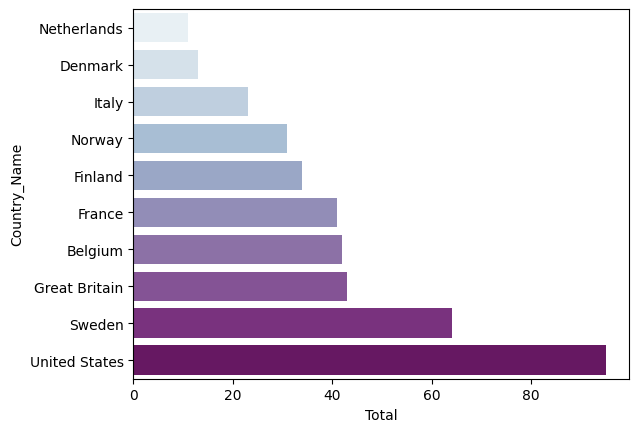

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1920.sort_values(['Total']),palette="BuPu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals France-Paris - 1924</center></h1>
</div>

The 1924 Summer Olympics (French: Jeux olympiques d'été de 1924), officially known as the Games of the VIII Olympiad (French: Jeux de la VIIIe olympiade) and commonly known as Paris 1924, were an international multi-sport event which was celebrated in 1924 in Paris, France.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/1924_Summer_Olympics_logo.svg/330px-1924_Summer_Olympics_logo.svg.png)


It was the second time Paris hosted the games (after 1900), becoming the first city to host the Olympics twice. The selection process for the 1924 Summer Olympics consisted of six bids, and Paris was selected ahead of Amsterdam, Barcelona, Los Angeles, Prague, and Rome. The selection was made at the 20th IOC Session in Lausanne in 1921.


The opening ceremony was held on 5 July, but some competitions were already started from 4 May. The United States won the most gold and overall medals, having 229 athletes competing compared to the host's 401.

In [ ]:
medals_1924=medals[medals['year']=='1924'].drop(['year','Country_Code'],axis=1).head(10)
medals_1924

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
60  United States     Paris       France    45      27      27     99
61        Finland     Paris       France    14      13      10     37
62         France     Paris       France    13      15      10     38
63  Great Britain     Paris       France     9      13      12     34
64          Italy     Paris       France     8       3       5     16
65    Switzerland     Paris       France     7       8      10     25
66         Norway     Paris       France     5       2       3     10
67         Sweden     Paris       France     4      13      12     29
68    Netherlands     Paris       France     4       1       5     10
69        Belgium     Paris       France     3       7       3     13

/tmp/ipython-input-2415238540.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1924.sort_values(['Gold']),palette="Greens")


<Axes: xlabel='Gold', ylabel='Country_Name'>

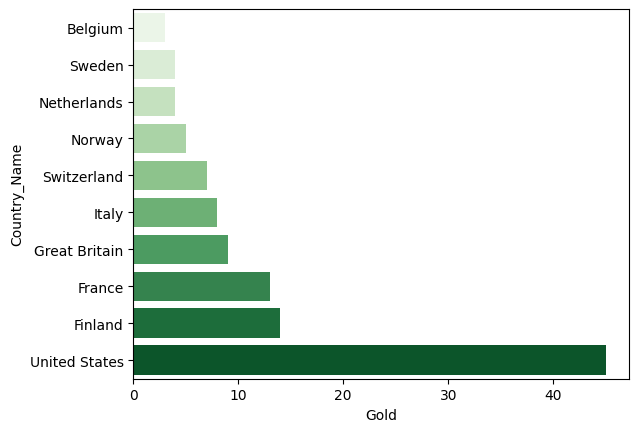

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1924.sort_values(['Gold']),palette="Greens")

/tmp/ipython-input-2244887762.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1924.sort_values(['Silver']),palette="Greens")


<Axes: xlabel='Silver', ylabel='Country_Name'>

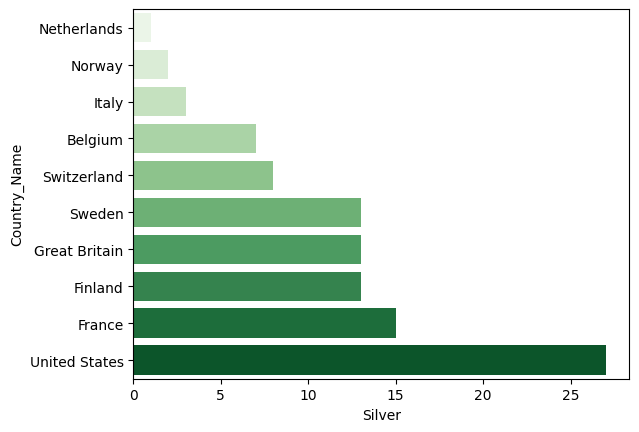

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1924.sort_values(['Silver']),palette="Greens")

/tmp/ipython-input-1855546348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1924.sort_values(['Bronze']),palette="Greens")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

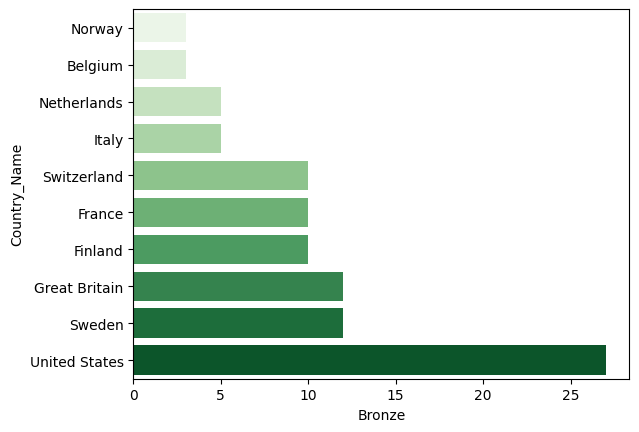

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1924.sort_values(['Bronze']),palette="Greens")

/tmp/ipython-input-4121435041.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1924.sort_values(['Total']),palette="Greens")


<Axes: xlabel='Total', ylabel='Country_Name'>

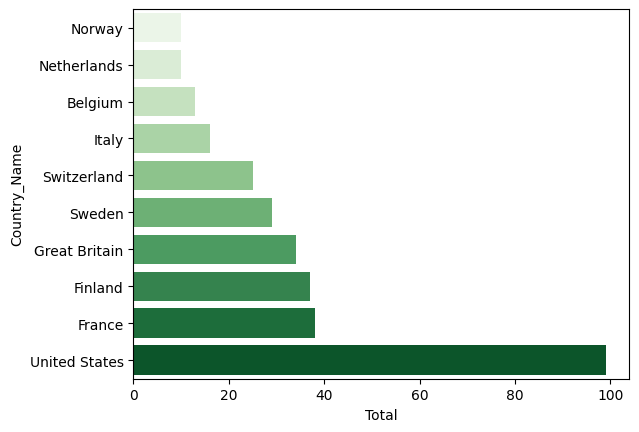

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1924.sort_values(['Total']),palette="Greens")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Netherlands-Amsterdam - 1928</center></h1>
</div>

The 1928 Summer Olympics (Dutch: Olympische Zomerspelen 1928), officially known as the Games of the IX Olympiad (Dutch: Spelen van de IXe Olympiade) and commonly known as Amsterdam 1928, was an international multi-sport event that was celebrated from 28 July to 12 August 1928 in Amsterdam, Netherlands. The city of Amsterdam had previously bid for the 1920 and 1924 Olympic Games, but was obliged to give way to war-torn Antwerp in Belgium for the 1920 Games and Pierre de Coubertin's Paris for the 1924 Games.

![summer](https://upload.wikimedia.org/wikipedia/en/f/f9/1928_Olympics_poster.jpg)

The only other candidate city for the 1928 Olympics was Los Angeles, which would eventually be selected to host the Olympics four years later.
The United States won the most gold and overall medals.

In [ ]:
medals_1928=medals[medals['year']=='1928'].drop(['year','Country_Code'],axis=1).head(10)
medals_1928

Country_Name  Host_city Host_country  Gold  Silver  Bronze  Total
27  United States  Amsterdam  Netherlands    22      18      16     56
28        Germany  Amsterdam  Netherlands    10       7      14     31
29        Finland  Amsterdam  Netherlands     8       8       9     25
30         Sweden  Amsterdam  Netherlands     7       6      12     25
31          Italy  Amsterdam  Netherlands     7       5       7     19
32    Switzerland  Amsterdam  Netherlands     7       4       4     15
33         France  Amsterdam  Netherlands     6      10       5     21
34    Netherlands  Amsterdam  Netherlands     6       9       4     19
35        Hungary  Amsterdam  Netherlands     4       5       0      9
36         Canada  Amsterdam  Netherlands     4       4       7     15

/tmp/ipython-input-2539543737.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1928.sort_values(['Gold']),palette="GnBu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

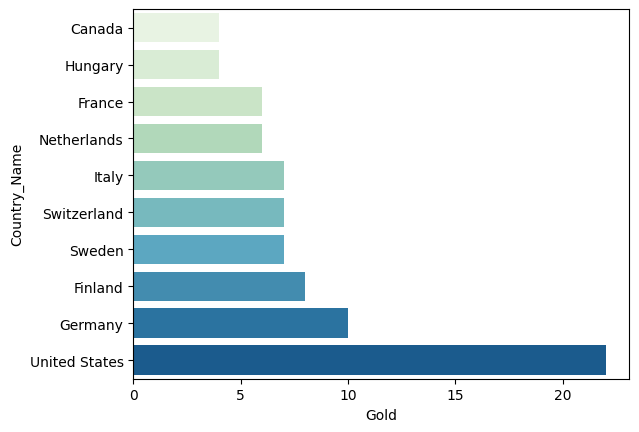

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1928.sort_values(['Gold']),palette="GnBu")

/tmp/ipython-input-1007557092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1928.sort_values(['Silver']),palette="GnBu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

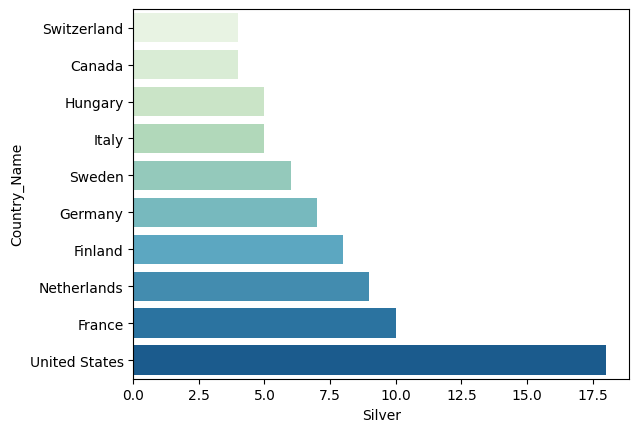

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1928.sort_values(['Silver']),palette="GnBu")

/tmp/ipython-input-1220289793.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1928.sort_values(['Bronze']),palette="GnBu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

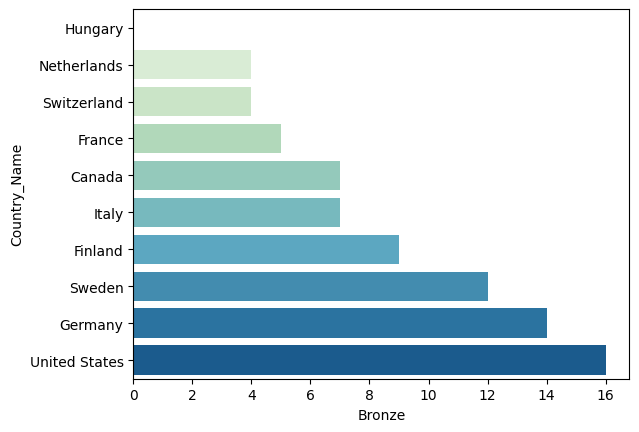

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1928.sort_values(['Bronze']),palette="GnBu")

/tmp/ipython-input-1453075705.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1928.sort_values(['Total']),palette="GnBu")


<Axes: xlabel='Total', ylabel='Country_Name'>

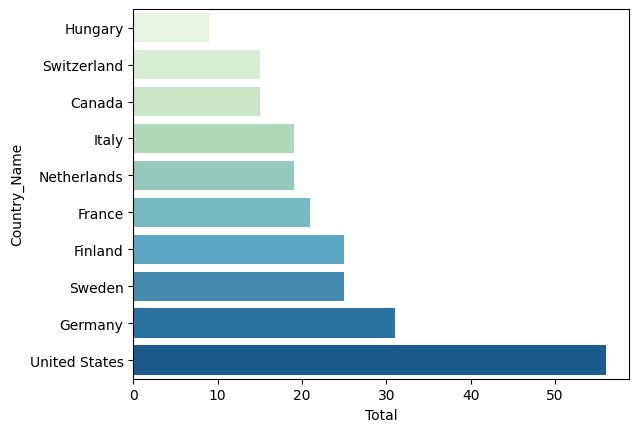

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1928.sort_values(['Total']),palette="GnBu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals United States-Los Angeles - 1932</center></h1>
</div>

The 1932 Summer Olympics, officially known as the Games of the X Olympiad and commonly known as Los Angeles 1932, was an international multi-sport event that was held from July 30 to August 14, 1932, in Los Angeles, California, United States.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/0/0f/1932_Summer_Olympics_logo.svg/255px-1932_Summer_Olympics_logo.svg.png)


The Games were held during the worldwide Great Depression and some nations did not travel to Los Angeles; 37 nations competed compared to 46 in the 1928 Summer Olympics in Amsterdam. Even U.S. President Herbert Hoover missed the Games.



In [ ]:
medals_1932=medals[medals['year']=='1932'].drop(['year','Country_Code'],axis=1).head(10)
medals_1932

Country_Name    Host_city   Host_country  Gold  Silver  Bronze  Total
0  United States  Los Angeles  United States    41      32      30    103
1          Italy  Los Angeles  United States    12      12      12     36
2         France  Los Angeles  United States    10       5       4     19
3         Sweden  Los Angeles  United States     9       5       9     23
4          Japan  Los Angeles  United States     7       7       4     18
5        Hungary  Los Angeles  United States     6       4       5     15
6        Finland  Los Angeles  United States     5       8      12     25
7  Great Britain  Los Angeles  United States     4       7       5     16
8        Germany  Los Angeles  United States     3      12       5     20
9      Australia  Los Angeles  United States     3       1       1      5

/tmp/ipython-input-2264882761.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1932.sort_values(['Gold']),palette="Pastel1")


<Axes: xlabel='Gold', ylabel='Country_Name'>

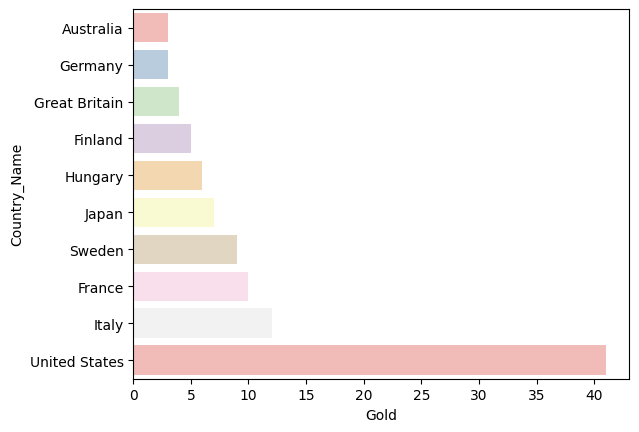

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1932.sort_values(['Gold']),palette="Pastel1")

/tmp/ipython-input-1700307817.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1932.sort_values(['Silver']),palette="Pastel1")


<Axes: xlabel='Silver', ylabel='Country_Name'>

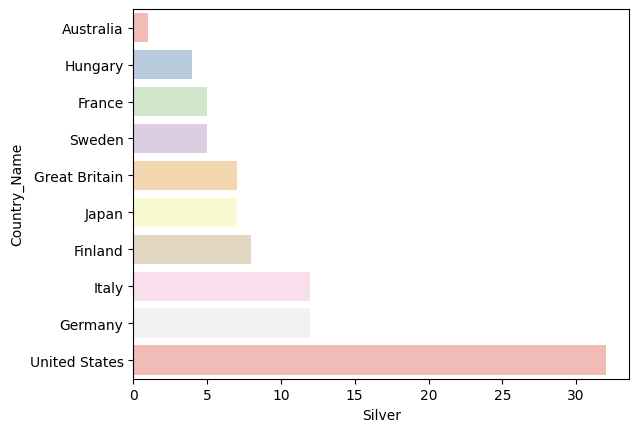

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1932.sort_values(['Silver']),palette="Pastel1")

/tmp/ipython-input-2028036499.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1932.sort_values(['Bronze']),palette="Pastel1")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

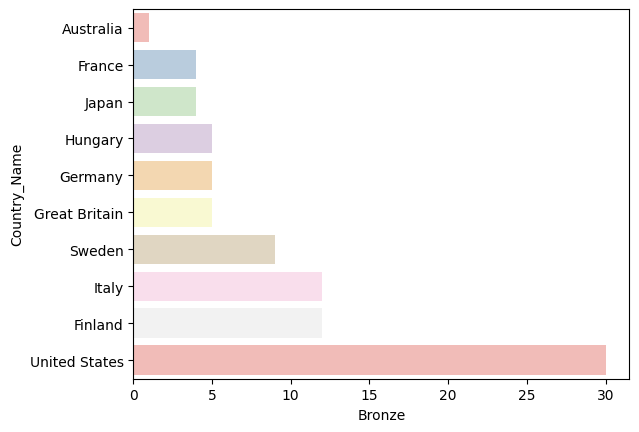

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1932.sort_values(['Bronze']),palette="Pastel1")

/tmp/ipython-input-3702724794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1932.sort_values(['Total']),palette="Pastel1")


<Axes: xlabel='Total', ylabel='Country_Name'>

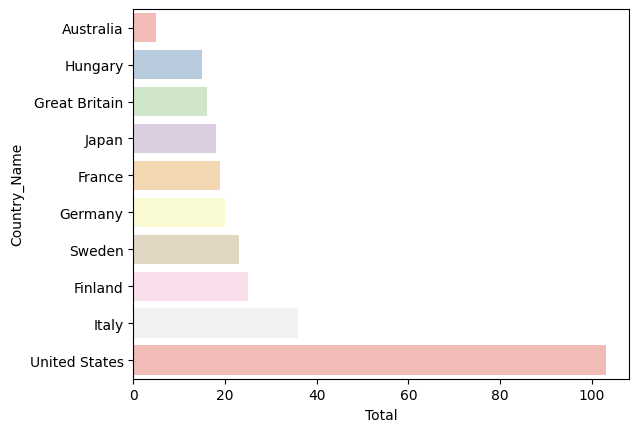

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1932.sort_values(['Total']),palette="Pastel1")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Germany-Berlin - 1936</center></h1>
</div>

The 1936 Summer Olympics (German: Olympische Sommerspiele 1936), officially known as the Games of the XI Olympiad (German: Spiele der XI. Olympiade) and commonly known as Berlin 1936, were an international multi-sport event held from 1 to 16 August 1936 in Berlin, Germany. Berlin won the bid to host the Games over Barcelona at the 29th IOC Session on 26 April 1931.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/1936_berlin_logo.jpg/330px-1936_berlin_logo.jpg)

The 1936 Games marked the second and most recent time the International Olympic Committee gathered to vote in a city that was bidding to host those Games. Later rule modifications forbade cities hosting the bid vote from being awarded the games.

To outdo the 1932 Los Angeles Games, Reich Chancellor Adolf Hitler had a new 100,000-seat track and field stadium built, as well as six gymnasiums and other smaller arenas. The Games were the first to be televised, with radio broadcasts reaching 41 countries.



In [ ]:
medals_1936=medals[medals['year']=='1936'].drop(['year','Country_Code'],axis=1).head(10)
medals_1936

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
1312        Germany    Berlin      Germany    33      26      30     89
1313  United States    Berlin      Germany    24      20      12     56
1314        Hungary    Berlin      Germany    10       1       5     16
1315          Italy    Berlin      Germany     8       9       5     22
1316        Finland    Berlin      Germany     7       6       6     19
1317         France    Berlin      Germany     7       6       6     19
1318         Sweden    Berlin      Germany     6       5       9     20
1319          Japan    Berlin      Germany     6       4       8     18
1320    Netherlands    Berlin      Germany     6       4       7     17
1321  Great Britain    Berlin      Germany     4       7       3     14

/tmp/ipython-input-162073351.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1936.sort_values(['Gold']),palette="BuGn")


<Axes: xlabel='Gold', ylabel='Country_Name'>

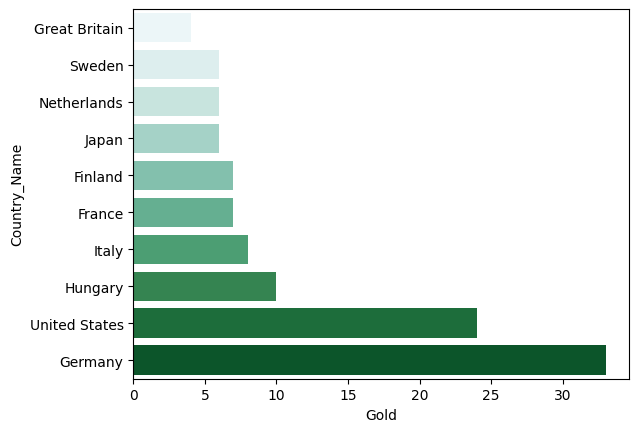

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1936.sort_values(['Gold']),palette="BuGn")

/tmp/ipython-input-481150139.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1936.sort_values(['Silver']),palette="BuGn")


<Axes: xlabel='Silver', ylabel='Country_Name'>

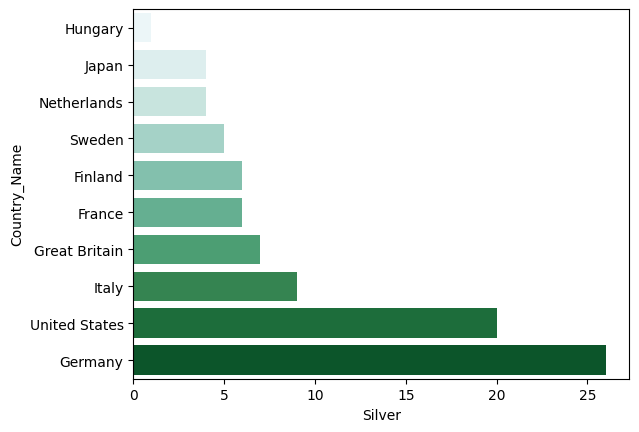

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1936.sort_values(['Silver']),palette="BuGn")

/tmp/ipython-input-1485526242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1936.sort_values(['Bronze']),palette="BuGn")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

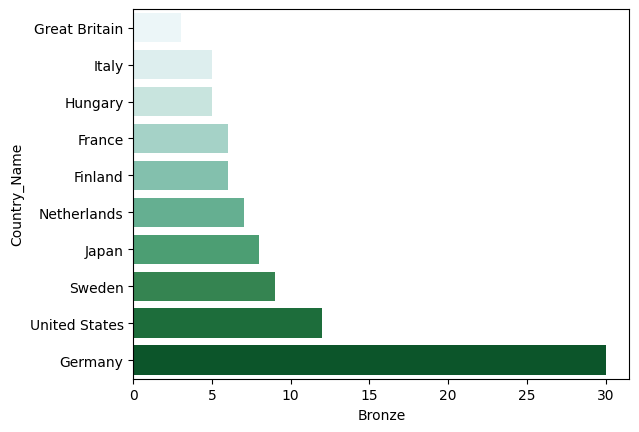

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1936.sort_values(['Bronze']),palette="BuGn")

/tmp/ipython-input-236165069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1936.sort_values(['Total']),palette="BuGn")


<Axes: xlabel='Total', ylabel='Country_Name'>

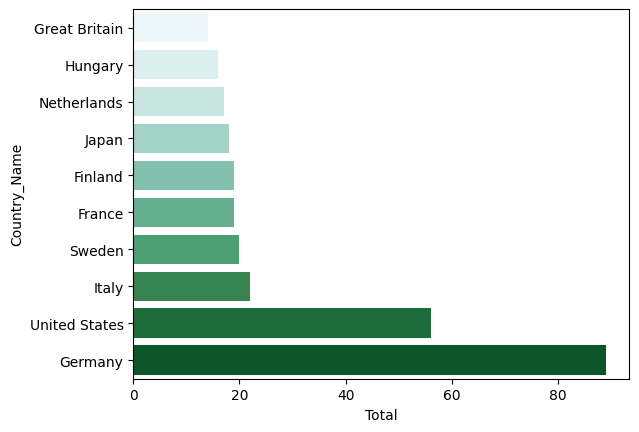

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1936.sort_values(['Total']),palette="BuGn")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Great Britain-London - 1948</center></h1>
</div>

The 1948 Summer Olympics (officially known as the Games of the XIV Olympiad and commonly known as London 1948) was an international multi-sport event held from 29 July to 14 August 1948 in London, United Kingdom. Following a twelve-year hiatus caused by the outbreak of World War II, these were the first Summer Olympics held since the 1936 Games in Berlin. The 1940 Olympic Games had been scheduled for Tokyo and then for Helsinki, while the 1944 Olympic Games had been provisionally planned for London. This was the second time London had hosted the Olympic Games, having previously hosted them in 1908, forty years earlier. The Olympics would again return to London 64 years later in 2012, making London the first city to have hosted the games three times, and the only such city until Paris and Los Angeles host their third games in 2024 and 2028, respectively. The 1948 Olympic Games were also the first of two summer Games held under the IOC presidency of Sigfrid Edström.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/4/47/1948_Summer_Olympics_logos.svg/266px-1948_Summer_Olympics_logos.svg.png)

The event came to be known as the Austerity Games because of the difficult economic climate and rationing imposed in the aftermath of World War II. No new venues were built for the games (with events taking place mainly at Wembley Stadium also known as Empire Stadium and the Empire Pool at Wembley Park), and athletes were housed in existing accommodation at the Wembley area instead of an Olympic Village, as were the 1936 Games and the subsequent 1952 Games in Helsinki. A record 59 nations were represented by 4,104 athletes, 3,714 men, and 390 women in 19 sport disciplines.
Germany and Japan were not invited to participate in the games; the Soviet Union was invited but chose not to send any athletes, sending observers instead to prepare for the 1952 Olympics.


In [ ]:
medals_1948=medals[medals['year']=='1948'].drop(['year','Country_Code'],axis=1).head(10)
medals_1948

Country_Name Host_city   Host_country  Gold  Silver  Bronze  Total
1275   United States    London  Great Britain    38      27      19     84
1276          Sweden    London  Great Britain    16      11      17     44
1277          France    London  Great Britain    10       6      13     29
1278         Hungary    London  Great Britain    10       5      12     27
1279           Italy    London  Great Britain     8      11       8     27
1280         Finland    London  Great Britain     8       7       5     20
1281          Turkey    London  Great Britain     6       4       2     12
1282  Czechoslovakia    London  Great Britain     6       2       3     11
1283     Switzerland    London  Great Britain     5      10       5     20
1284         Denmark    London  Great Britain     5       7       8     20

/tmp/ipython-input-3477174553.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1948.sort_values(['Gold']),palette="OrRd")


<Axes: xlabel='Gold', ylabel='Country_Name'>

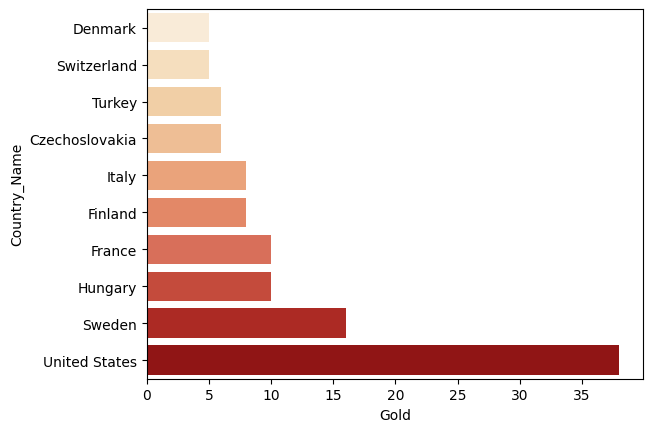

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1948.sort_values(['Gold']),palette="OrRd")

/tmp/ipython-input-3887783182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1948.sort_values(['Silver']),palette="OrRd")


<Axes: xlabel='Silver', ylabel='Country_Name'>

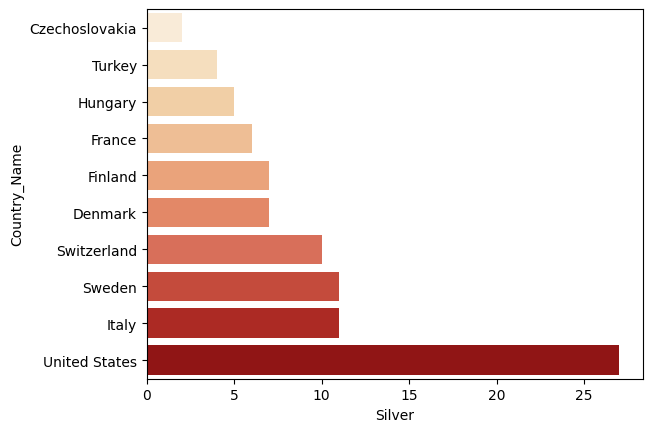

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1948.sort_values(['Silver']),palette="OrRd")

/tmp/ipython-input-1192001054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1948.sort_values(['Bronze']),palette="OrRd")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

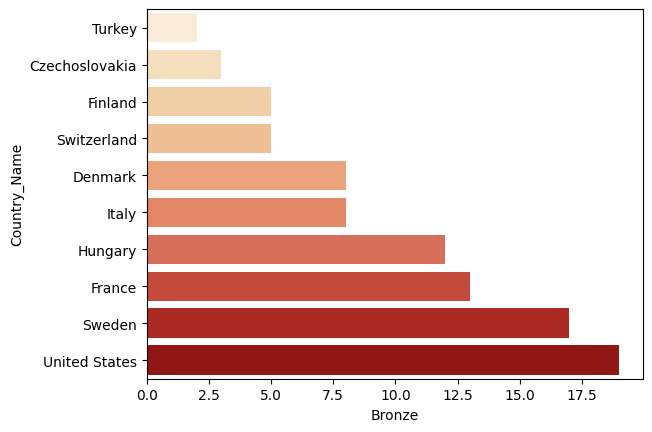

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1948.sort_values(['Bronze']),palette="OrRd")

/tmp/ipython-input-3734636742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1948.sort_values(['Total']),palette="OrRd")


<Axes: xlabel='Total', ylabel='Country_Name'>

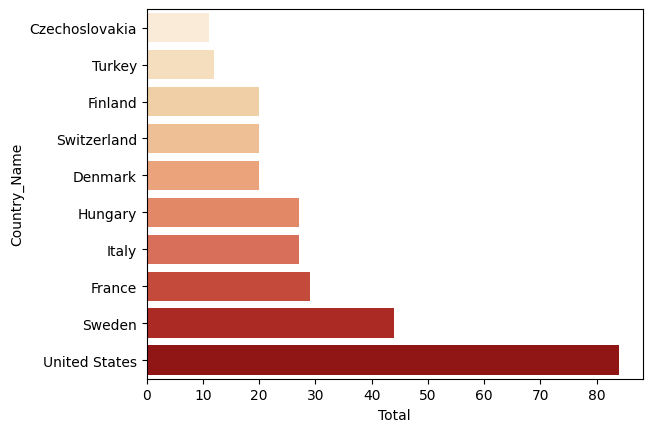

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1948.sort_values(['Total']),palette="OrRd")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Finland-Helsinki - 1952</center></h1>
</div>

The 1952 Summer Olympics (Finnish: Kesäolympialaiset 1952; Swedish: Olympiska sommarspelen 1952), officially known as the Games of the XV Olympiad (Finnish: XV olympiadin kisat; Swedish: Den XV olympiadens spel) and commonly known as Helsinki 1952 (Swedish: Helsingfors 1952), were an international multi-sport event held from 19 July to 3 August 1952 in Helsinki, Finland.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/c/cd/1952_Summer_Olympics_logo.svg/137px-1952_Summer_Olympics_logo.svg.png)

After Japan declared in 1938 that it would be unable to host 1940 Olympics in Tokyo due to the ongoing Second Sino-Japanese War, Helsinki had been selected to host the 1940 Summer Olympics, which were then cancelled due to World War II. Tokyo eventually hosted the games in 1964. Helsinki is the northernmost city at which a summer Olympic Games have been held. With London hosting the 1948 Olympics, 1952 is the most recent time when two consecutive summer Olympics Games were held entirely in Europe.

They were also the Olympic Games at which the most world records were broken until they were surpassed by the 2008 Summer Games in Beijing. The Soviet Union, the People's Republic of China, Hong Kong, Indonesia, Israel, Thailand, and Saarland made their Olympic debuts at the 1952 Games. The United States won the most gold and overall medals.

In [ ]:
medals_1952=medals[medals['year']=='1952'].drop(['year','Country_Code'],axis=1).head(10)
medals_1952

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
1232   United States  Helsinki      Finland    40      19      17     76
1233    Soviet Union  Helsinki      Finland    22      30      19     71
1234         Hungary  Helsinki      Finland    16      10      16     42
1235          Sweden  Helsinki      Finland    12      13      10     35
1236           Italy  Helsinki      Finland     8       9       4     21
1237  Czechoslovakia  Helsinki      Finland     7       3       3     13
1238          France  Helsinki      Finland     6       6       6     18
1239         Finland  Helsinki      Finland     6       3      13     22
1240       Australia  Helsinki      Finland     6       2       3     11
1241          Norway  Helsinki      Finland     3       2       0      5

/tmp/ipython-input-3372233529.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1952.sort_values(['Gold']),palette="PRGn")


<Axes: xlabel='Gold', ylabel='Country_Name'>

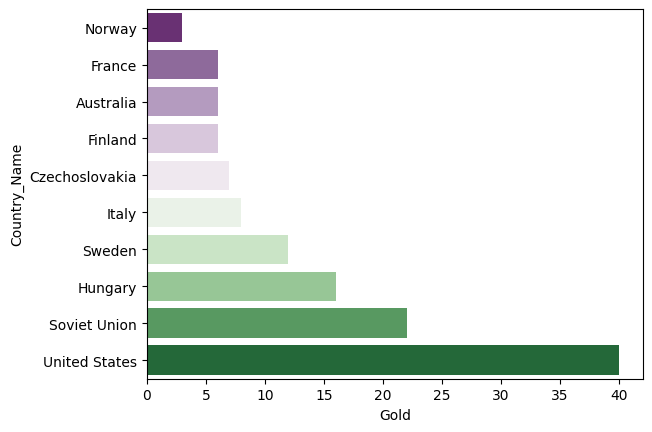

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1952.sort_values(['Gold']),palette="PRGn")

/tmp/ipython-input-1213217205.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1952.sort_values(['Silver']),palette="PRGn")


<Axes: xlabel='Silver', ylabel='Country_Name'>

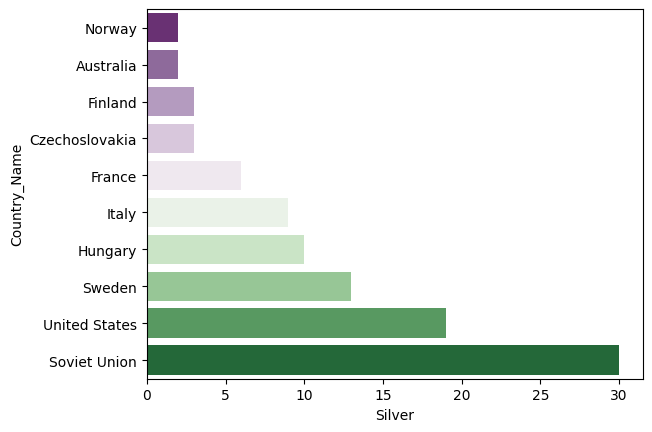

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1952.sort_values(['Silver']),palette="PRGn")

/tmp/ipython-input-2597862557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1952.sort_values(['Bronze']),palette="PRGn")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

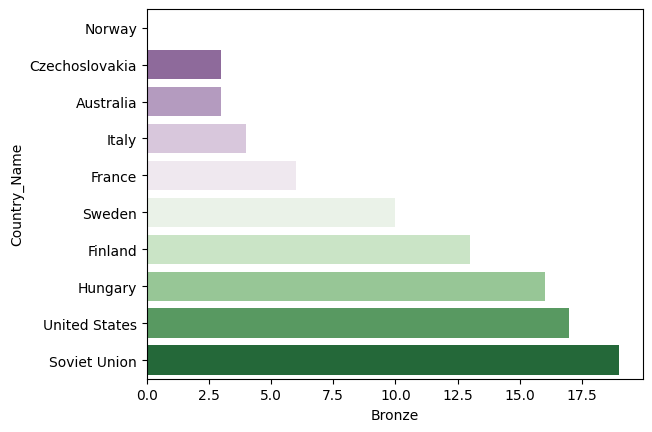

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1952.sort_values(['Bronze']),palette="PRGn")

/tmp/ipython-input-2878708091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1952.sort_values(['Total']),palette="PRGn")


<Axes: xlabel='Total', ylabel='Country_Name'>

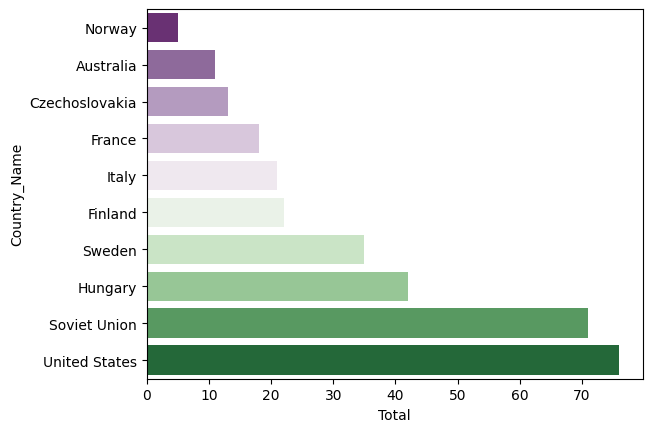

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1952.sort_values(['Total']),palette="PRGn")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals 1956</center></h1>
</div>

The 1956 Summer Olympics, officially known as the Games of the XVI Olympiad and commonly known as Melbourne 1956, were an international multi-sport event held in Melbourne, Victoria, Australia, from 22 November to 8 December 1956, with the exception of the equestrian events, which were held in Stockholm, Sweden, in June 1956.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/e/e3/1956_Summer_Olympics_logo.svg/225px-1956_Summer_Olympics_logo.svg.png)

These Games were the first to be staged in the Southern Hemisphere and Oceania, as well as the first to be held outside Europe and North America. Melbourne is the most southerly city ever to host the Olympics. Due to the Southern Hemisphere's seasons being different from those in the Northern Hemisphere, the 1956 Games did not take place at the usual time of year, because of the need to hold the events during the warmer weather of the host's spring/summer (which corresponds to the Northern Hemisphere's autumn/winter). Australia did not host the Games again until 2000 in Sydney, New South Wales, and will host them again in 2032 in Brisbane, Queensland.

The Olympic equestrian events could not be held in Melbourne due to Australia's strict quarantine regulations, so they were held in Stockholm five months earlier. This was the second time the Olympics were not held entirely in one country, the first being the 1920 Summer Olympics in Antwerp, Belgium, with some events taking place in Ostend, Belgium and Amsterdam, Netherlands. Despite uncertainties and various complications encountered during the preparations, the 1956 Games went ahead in Melbourne as planned and turned out to be a success. The enduring tradition of national teams parading as one during the closing ceremony was started at these Olympics.

Eight teams boycotted the Games for various reasons. Four teams boycotted in response to the Suez Crisis where Egypt was invaded by Israel, France and the United Kingdom, three in response to the Soviet invasion of Hungary and one in response to the presence of the Republic of China at the Games.

The Soviet Union won the most gold and overall medals.

In [ ]:
medals_1956=medals[medals['year']=='1956'].drop(['year','Country_Code'],axis=1).head(10)
medals_1956

Country_Name Host_city Host_country  Gold  Silver  Bronze  \
1194            Soviet Union                           37      29      32   
1195           United States                           32      25      17   
1196               Australia                           13       8      14   
1197                 Hungary                            9      10       7   
1198                   Italy                            8       8       9   
1199                  Sweden                            8       5       6   
1200  United Team of Germany                            6      13       7   
1201           Great Britain                            6       7      11   
1202                 Romania                            5       3       5   
1203                   Japan                            4      10       5   

      Total  
1194     98  
1195     74  
1196     35  
1197     26  
1198     25  
1199     19  
1200     26  
1201     24  
1202     13  
1203     19

/tmp/ipython-input-2664626000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1956.sort_values(['Gold']),palette="Paired")


<Axes: xlabel='Gold', ylabel='Country_Name'>

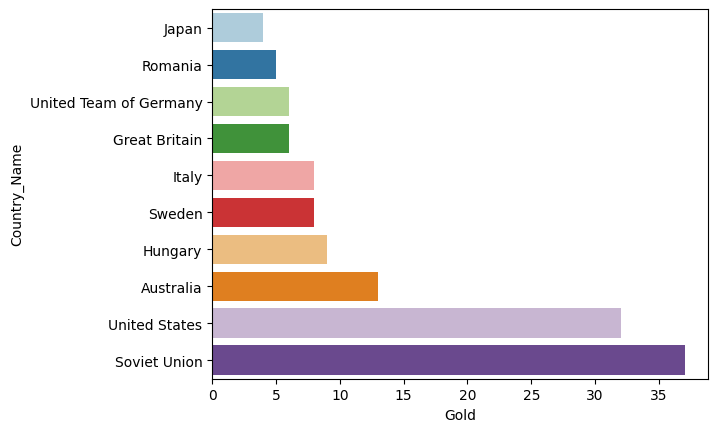

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1956.sort_values(['Gold']),palette="Paired")

/tmp/ipython-input-2996720272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1956.sort_values(['Silver']),palette="Paired")


<Axes: xlabel='Silver', ylabel='Country_Name'>

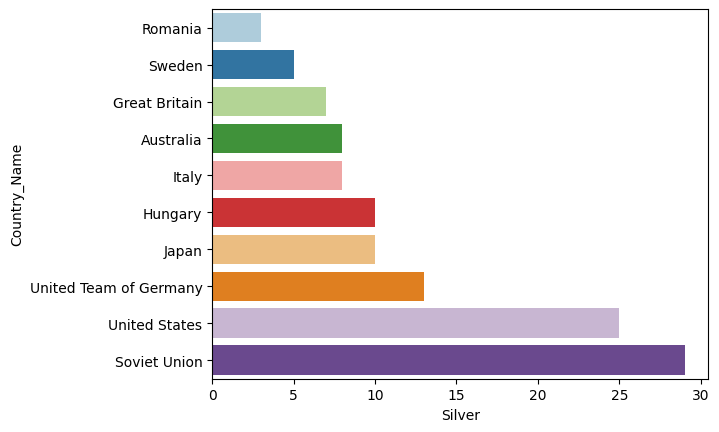

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1956.sort_values(['Silver']),palette="Paired")

/tmp/ipython-input-1245697613.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1956.sort_values(['Bronze']),palette="Paired")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

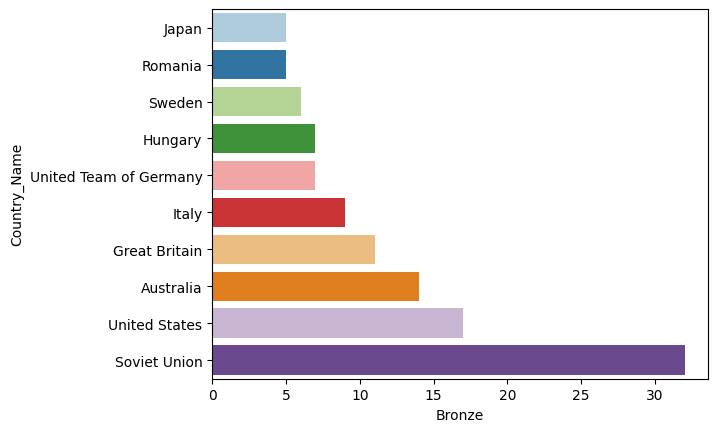

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1956.sort_values(['Bronze']),palette="Paired")

/tmp/ipython-input-3476786706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1956.sort_values(['Total']),palette="Paired")


<Axes: xlabel='Total', ylabel='Country_Name'>

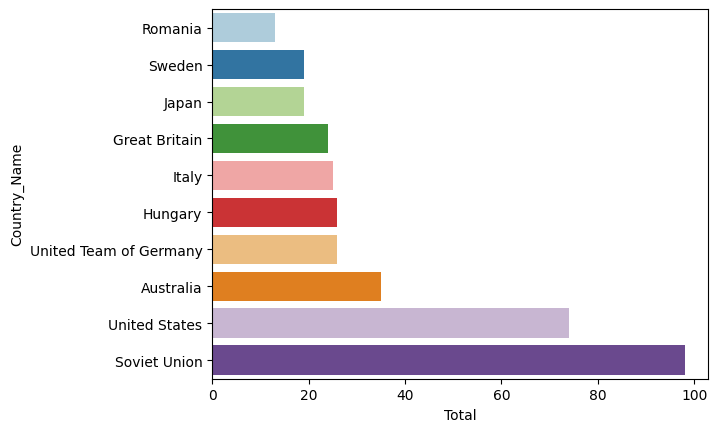

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1956.sort_values(['Total']),palette="Paired")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Italy-Rome - 1960</center></h1>
</div>

The 1960 Summer Olympics (Italian: Giochi Olimpici estivi del 1960), officially known as the Games of the XVII Olympiad (Italian: Giochi della XVII Olimpiade) and commonly known as Rome 1960 (Italian: Roma 1960), were an international multi-sport event held from 25 August to 11 September 1960 in Rome, Italy.

![summer](https://upload.wikimedia.org/wikipedia/en/1/11/1960_Summer_Olympics_logo.png)


Rome had previously been awarded the administration of the 1908 Summer Olympics, but following the eruption of Mount Vesuvius in 1906, the city had no choice but to decline and pass the honour to London. The Soviet Union won the most gold and overall medals at the 1960 Games.

In [ ]:
medals_1960=medals[medals['year']=='1960'].drop(['year','Country_Code'],axis=1).head(10)
medals_1960

Country_Name Host_city Host_country  Gold  Silver  Bronze  \
449            Soviet Union      Rome        Italy    43      29      31   
450           United States      Rome        Italy    34      21      16   
451                   Italy      Rome        Italy    13      10      13   
452  United Team of Germany      Rome        Italy    12      19      11   
453               Australia      Rome        Italy     8       8       6   
454                  Turkey      Rome        Italy     7       2       0   
455                 Hungary      Rome        Italy     6       8       7   
456                   Japan      Rome        Italy     4       7       7   
457                  Poland      Rome        Italy     4       6      11   
458          Czechoslovakia      Rome        Italy     3       2       3   

     Total  
449    103  
450     71  
451     36  
452     42  
453     22  
454      9  
455     21  
456     18  
457     21  
458      8

/tmp/ipython-input-3762305220.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1960.sort_values(['Gold']),palette="Pastel1")


<Axes: xlabel='Gold', ylabel='Country_Name'>

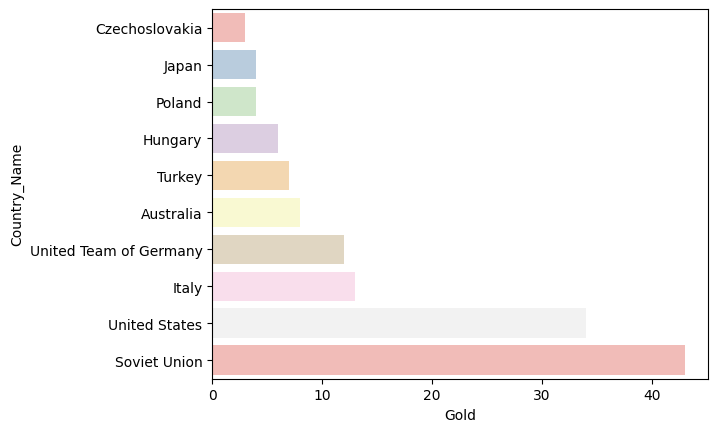

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1960.sort_values(['Gold']),palette="Pastel1")

/tmp/ipython-input-433610028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1960.sort_values(['Silver']),palette="Pastel1")


<Axes: xlabel='Silver', ylabel='Country_Name'>

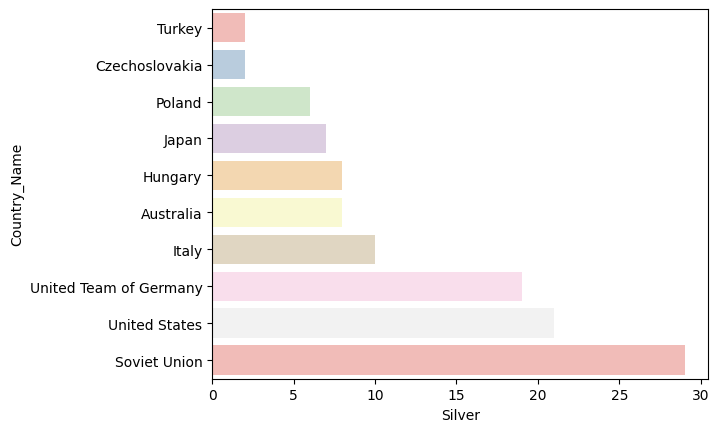

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1960.sort_values(['Silver']),palette="Pastel1")

/tmp/ipython-input-1976469086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1960.sort_values(['Bronze']),palette="Pastel1")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

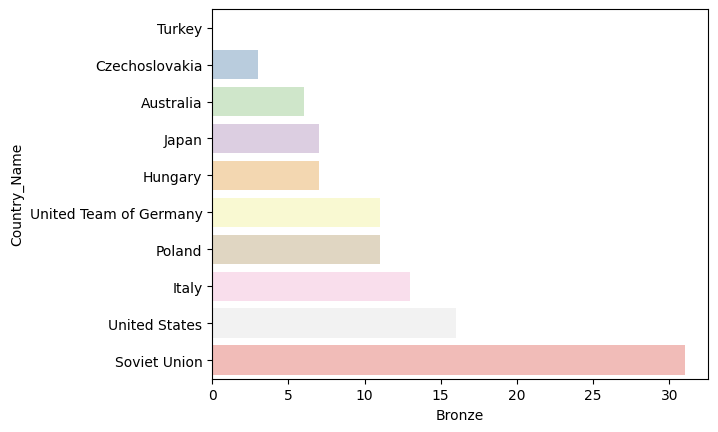

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1960.sort_values(['Bronze']),palette="Pastel1")

/tmp/ipython-input-3127202550.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1960.sort_values(['Total']),palette="Pastel1")


<Axes: xlabel='Total', ylabel='Country_Name'>

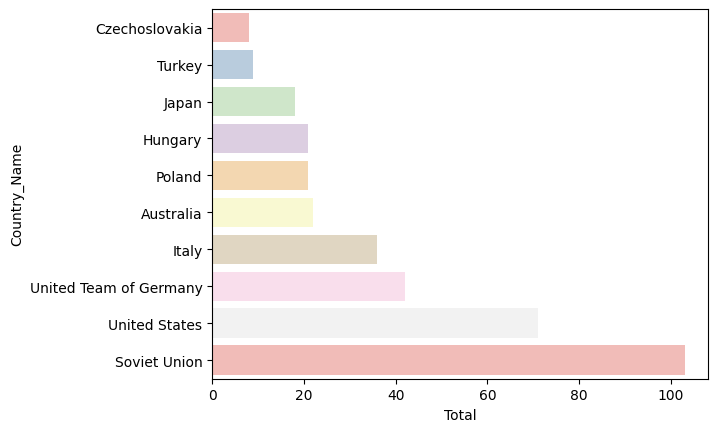

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1960.sort_values(['Total']),palette="Pastel1")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Japan-Tokyo - 1964</center></h1>
</div>

The 1964 Summer Olympics (Japanese: 1964年夏季オリンピック, Hepburn: 1964-Nen Kaki Orinpikku), officially the Games of the XVIII Olympiad (Japanese: 第18回オリンピック競技大会, Hepburn: Dai Jūhachi-kai Orinpikku Kyōgi Taikai) and commonly known as Tokyo 1964 (Japanese: 東京1964), were an international multi-sport event held from 10 to 24 October 1964 in Tokyo, Japan. Tokyo had been awarded the organization of the 1940 Summer Olympics, but this honor was subsequently passed to Helsinki due to Japan's invasion of China, before ultimately being cancelled due to World War II. Tokyo was chosen as the host city during the 55th IOC Session in West Germany on 26 May 1959.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Tokyo_1964_Summer_Olympics_logo.svg/180px-Tokyo_1964_Summer_Olympics_logo.svg.png)

The 1964 Summer Games were the first Olympics held in Asia, and marked the first time South Africa was excluded due to the use of its apartheid system in sports. Until 1960, South Africa had fielded segregated teams, conforming to the country's racial classifications; for the 1964 Games the International Olympic Committee demanded a multi-racial delegation to be sent, and after South Africa refused, they were excluded from participating. The country was, however, allowed to compete at the 1964 Summer Paralympics, also held in Tokyo, its Paralympic Games debut.


The games were scheduled for mid-October to avoid the city's midsummer heat and humidity and the September typhoon season.[6] The previous Olympics in Rome in 1960 started in late August and experienced hot weather. The following games in 1968 in Mexico City also began in October. The 1964 Olympics were also the last to use a traditional cinder track for the track events. Since 1968, a smooth, synthetic, all-weather track has been used. The United States won the most gold medals, while the Soviet Union won the most overall medals.

Tokyo hosted the 2020 Summer Olympics, making it the first city in Asia to host the Summer Olympic Games twice. Japan also hosted the Winter Olympics twice with the Sapporo 1972 and Nagano 1998 games.

In [ ]:
medals_1964=medals[medals['year']=='1964'].drop(['year','Country_Code'],axis=1).head(10)
medals_1964

Country_Name Host_city Host_country  Gold  Silver  Bronze  \
408           United States     Tokyo        Japan    36      26      28   
409            Soviet Union     Tokyo        Japan    30      31      35   
410                   Japan     Tokyo        Japan    16       5       8   
411  United Team of Germany     Tokyo        Japan    10      22      18   
412                   Italy     Tokyo        Japan    10      10       7   
413                 Hungary     Tokyo        Japan    10       7       5   
414                  Poland     Tokyo        Japan     7       6      10   
415               Australia     Tokyo        Japan     6       2      10   
416          Czechoslovakia     Tokyo        Japan     5       6       3   
417           Great Britain     Tokyo        Japan     4      12       2   

     Total  
408     90  
409     96  
410     29  
411     50  
412     27  
413     22  
414     23  
415     18  
416     14  
417     18

/tmp/ipython-input-3662141270.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1964.sort_values(['Gold']),palette="Pastel2")


<Axes: xlabel='Gold', ylabel='Country_Name'>

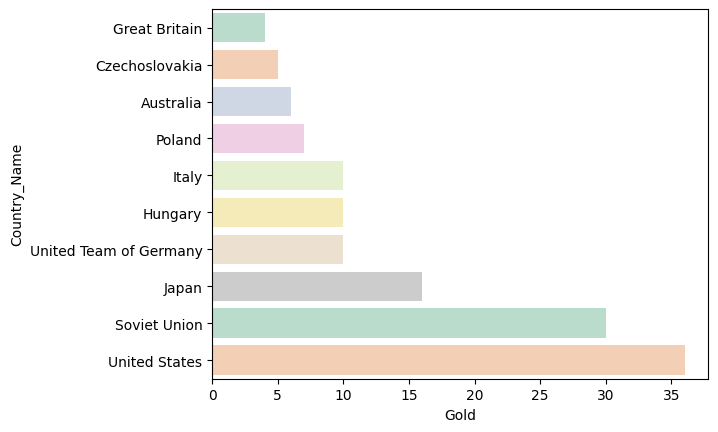

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1964.sort_values(['Gold']),palette="Pastel2")

/tmp/ipython-input-284537812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1964.sort_values(['Silver']),palette="Pastel2")


<Axes: xlabel='Silver', ylabel='Country_Name'>

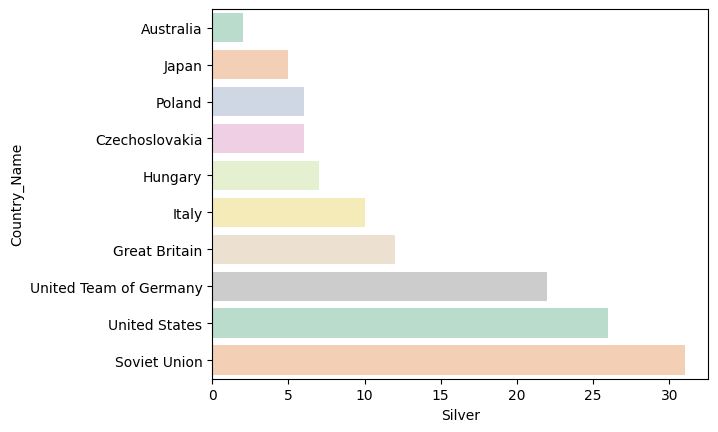

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1964.sort_values(['Silver']),palette="Pastel2")

/tmp/ipython-input-3674097648.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1964.sort_values(['Bronze']),palette="Pastel2")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

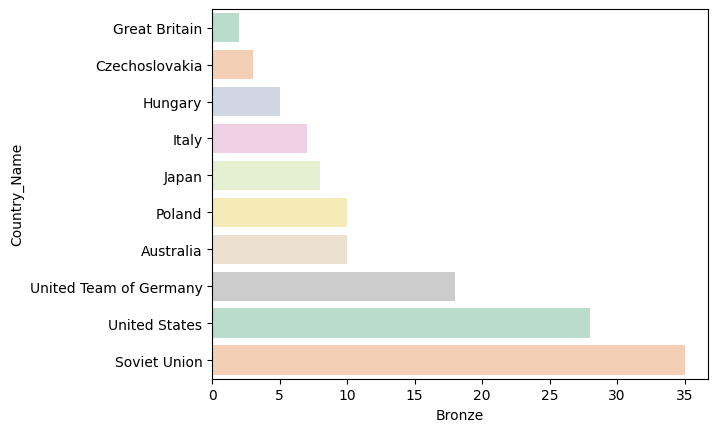

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1964.sort_values(['Bronze']),palette="Pastel2")

/tmp/ipython-input-1885569094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1964.sort_values(['Total']),palette="Pastel2")


<Axes: xlabel='Total', ylabel='Country_Name'>

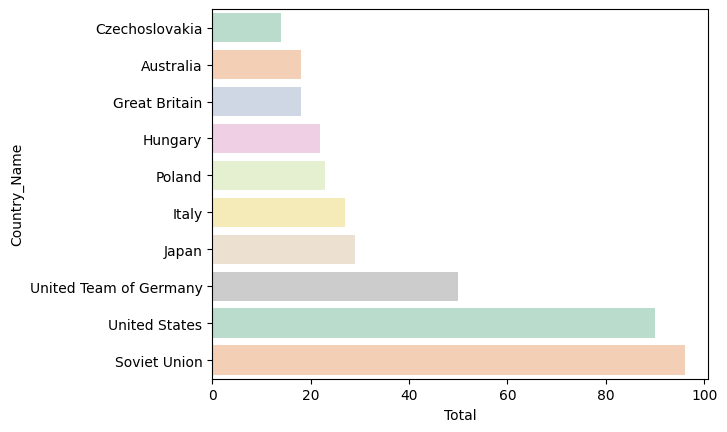

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1964.sort_values(['Total']),palette="Pastel2")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Mexico-Mexico City - 1968</center></h1>
</div>

The 1968 Summer Olympics (Spanish: Juegos Olímpicos de Verano de 1968), officially known as the Games of the XIX Olympiad (Spanish: Juegos de la XIX Olimpiada) and commonly known as Mexico 1968 (Spanish: México 1968), were an international multi-sport event held from 12 to 27 October 1968 in Mexico City, Mexico. These were the first Olympic Games to be staged in Latin America and the first to be staged in a Spanish-speaking country. They were also the first Games to use an all-weather (smooth) track for track and field events instead of the traditional cinder track. This was also the first example of the Olympics exclusively using electronic timekeeping equipment.

![summer](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/1968_Mexico_emblem.svg/330px-1968_Mexico_emblem.svg.png)

The 1968 Games were the third to be held in the last quarter of the year, after the 1956 Games in Melbourne and the 1964 Games in Tokyo. The 1968 Mexican Student Movement was crushed days prior, hence the Games were correlated to the government's repression.

The United States won the most gold and overall medals for the last time until 1984.

In [ ]:
medals_1968=medals[medals['year']=='1968'].drop(['year','Country_Code'],axis=1).head(10)
medals_1968

Country_Name    Host_city Host_country  Gold  Silver  Bronze  Total
364   United States  Mexico City       Mexico    45      28      34    107
365    Soviet Union  Mexico City       Mexico    29      32      30     91
366           Japan  Mexico City       Mexico    11       7       7     25
367         Hungary  Mexico City       Mexico    10      10      12     32
368    East Germany  Mexico City       Mexico     9       9       7     25
369          France  Mexico City       Mexico     7       3       5     15
370  Czechoslovakia  Mexico City       Mexico     7       2       4     13
371    West Germany  Mexico City       Mexico     5      11      10     26
372       Australia  Mexico City       Mexico     5       7       5     17
373   Great Britain  Mexico City       Mexico     5       5       3     13

/tmp/ipython-input-2346048604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1968.sort_values(['Gold']),palette="PiYG")


<Axes: xlabel='Gold', ylabel='Country_Name'>

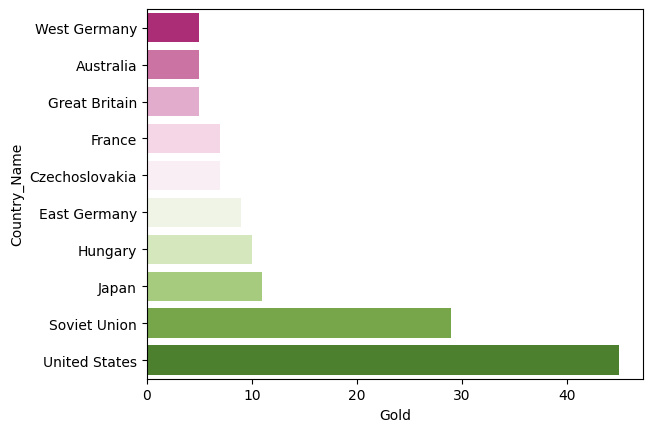

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1968.sort_values(['Gold']),palette="PiYG")

/tmp/ipython-input-281792197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1968.sort_values(['Silver']),palette="PiYG")


<Axes: xlabel='Silver', ylabel='Country_Name'>

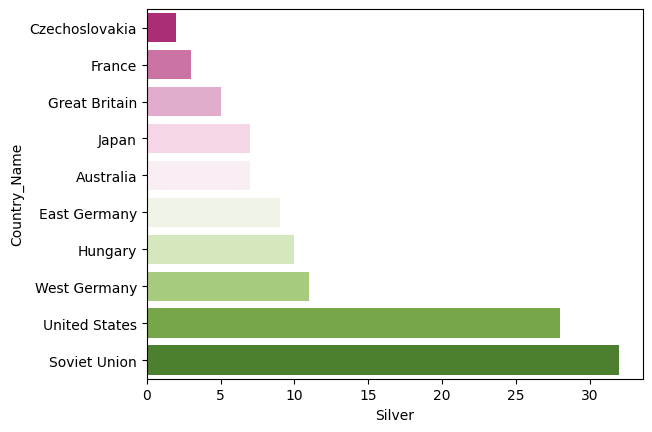

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1968.sort_values(['Silver']),palette="PiYG")

/tmp/ipython-input-2675284063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1968.sort_values(['Bronze']),palette="PiYG")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

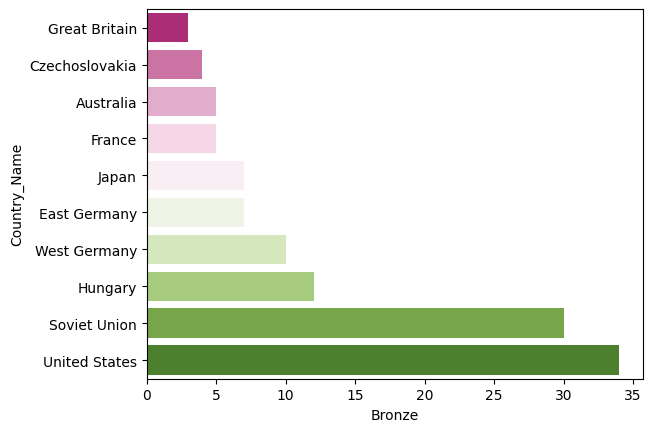

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1968.sort_values(['Bronze']),palette="PiYG")

/tmp/ipython-input-613327645.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1968.sort_values(['Total']),palette="PiYG")


<Axes: xlabel='Total', ylabel='Country_Name'>

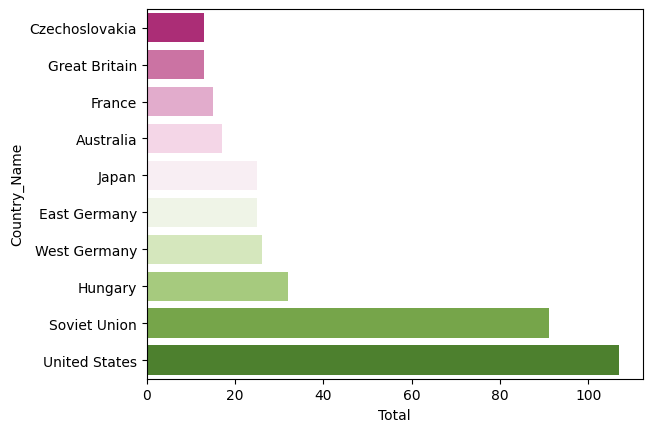

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1968.sort_values(['Total']),palette="PiYG")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals West Germany-Munich - 1972</center></h1>
</div>

The 1972 Summer Olympics (German: Olympische Sommerspiele 1972), officially known as the Games of the XX Olympiad (German: Spiele der XX. Olympiade) and commonly known as Munich 1972 (German: München 1972), was an international multi-sport event held in Munich, Bavaria, West Germany, from 26 August to 11 September 1972.

![summer](https://upload.wikimedia.org/wikipedia/en/thumb/d/d1/1972_Summer_Olympics_logo.svg/330px-1972_Summer_Olympics_logo.svg.png)

The 1972 Summer Olympics were the second Summer Olympics to be held in Germany, after the 1936 Games in Berlin, which had taken place under the Nazi regime. The West German Government had been eager to have the Munich Olympics present a democratic and optimistic Germany to the world, as shown by the Games' official motto, "Die Heiteren Spiele", or "the cheerful Games". The logo of the Games was a blue solar logo (the "Bright Sun") by Otl Aicher, the designer and director of the visual conception commission. The hostesses wore sky-blue dirndls as a promotion of Bavarian cultural heritage. The Olympic mascot, the dachshund "Waldi", was the first officially named Olympic mascot. The Olympic Fanfare was composed by Herbert Rehbein. The Soviet Union won the most gold and overall medals.

In [ ]:
medals_1972=medals[medals['year']=='1972'].drop(['year','Country_Code'],axis=1).head(10)
medals_1972

Country_Name Host_city  Host_country  Gold  Silver  Bronze  Total
316   Soviet Union    Munich  West Germany    50      27      22     99
317  United States    Munich  West Germany    33      31      30     94
318   East Germany    Munich  West Germany    20      23      23     66
319   West Germany    Munich  West Germany    13      11      16     40
320          Japan    Munich  West Germany    13       8       8     29
321      Australia    Munich  West Germany     8       7       2     17
322         Poland    Munich  West Germany     7       5       9     21
323        Hungary    Munich  West Germany     6      13      16     35
324       Bulgaria    Munich  West Germany     6      10       5     21
325          Italy    Munich  West Germany     5       3      10     18

/tmp/ipython-input-2299382616.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1972.sort_values(['Gold']),palette="PuBu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

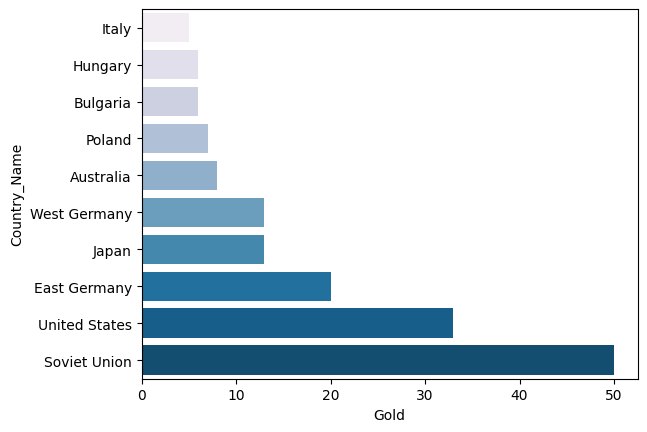

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1972.sort_values(['Gold']),palette="PuBu")

/tmp/ipython-input-1825431068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1972.sort_values(['Silver']),palette="PuBu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

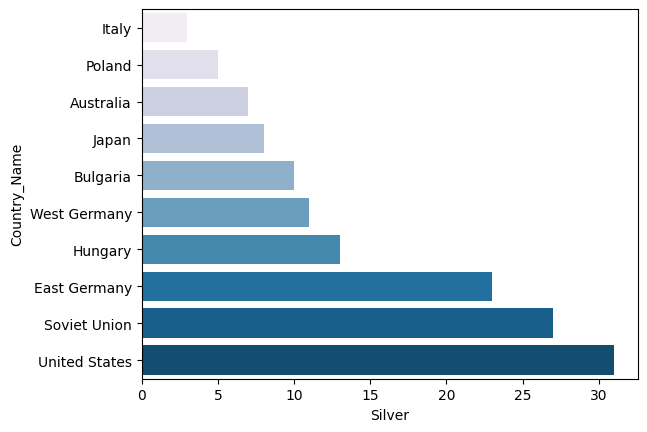

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1972.sort_values(['Silver']),palette="PuBu")

/tmp/ipython-input-1614886912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1972.sort_values(['Bronze']),palette="PuBu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

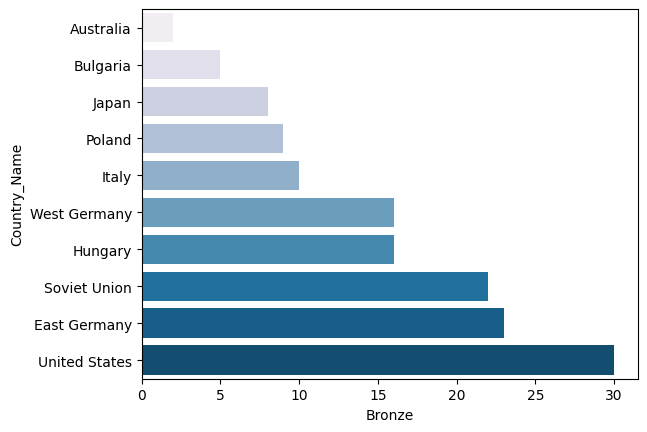

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1972.sort_values(['Bronze']),palette="PuBu")

/tmp/ipython-input-3205149920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1972.sort_values(['Total']),palette="PuBu")


<Axes: xlabel='Total', ylabel='Country_Name'>

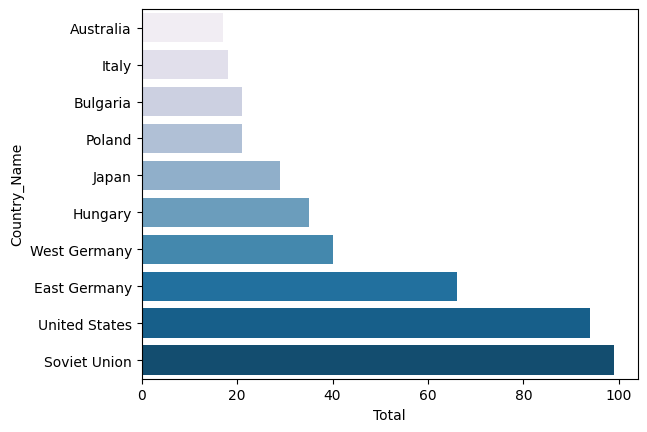

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1972.sort_values(['Total']),palette="PuBu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Canada-Montreal - 1976</center></h1>
</div>

The 1976 Summer Olympics (French: Jeux olympiques d'été de 1976), officially known as the Games of the XXI Olympiad (French: Jeux de la XXIe Olympiade) and commonly known as Montréal 1976, were an international multi-sport event held from July 17 to August 1, 1976 in Montréal, Quebec, Canada. Montreal was awarded the rights to the 1976 Games at the 69th IOC Session in Amsterdam on May 12, 1970, over the bids of Moscow and Los Angeles. It was the first and, so far, only Summer Olympic Games to be held in Canada. Toronto hosted the 1976 Summer Paralympics the same year as the Montreal Olympics, which still remains the only Summer Paralympics to be held in Canada. Calgary and Vancouver later hosted the Winter Olympic Games in 1988 and 2010, respectively.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/4/4e/1976_Summer_Olympics_logo.svg/330px-1976_Summer_Olympics_logo.svg.png)

Twenty-nine countries, mostly African, boycotted the Montreal Games when the International Olympic Committee (IOC) refused to ban New Zealand, after the New Zealand national rugby union team had toured South Africa earlier in 1976 in defiance of the United Nations' calls for a sporting embargo. The Soviet Union won the most gold and overall medals.



In [ ]:
medals_1976=medals[medals['year']=='1976'].drop(['year','Country_Code'],axis=1).head(10)
medals_1976

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
275   Soviet Union  Montreal       Canada    49      41      35    125
276   East Germany  Montreal       Canada    40      25      25     90
277  United States  Montreal       Canada    34      35      25     94
278   West Germany  Montreal       Canada    10      12      17     39
279          Japan  Montreal       Canada     9       6      10     25
280         Poland  Montreal       Canada     7       6      13     26
281       Bulgaria  Montreal       Canada     6       9       7     22
282           Cuba  Montreal       Canada     6       4       3     13
283        Romania  Montreal       Canada     4       9      14     27
284        Hungary  Montreal       Canada     4       5      13     22

/tmp/ipython-input-58550918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1976.sort_values(['Gold']),palette="PuBuGn")


<Axes: xlabel='Gold', ylabel='Country_Name'>

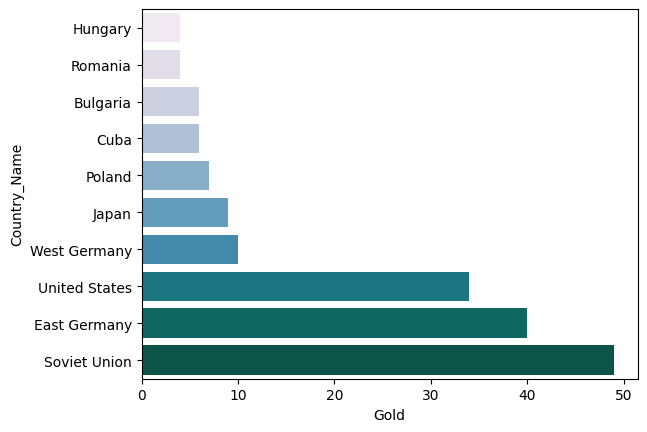

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1976.sort_values(['Gold']),palette="PuBuGn")

/tmp/ipython-input-1772868381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1976.sort_values(['Silver']),palette="PuBuGn")


<Axes: xlabel='Silver', ylabel='Country_Name'>

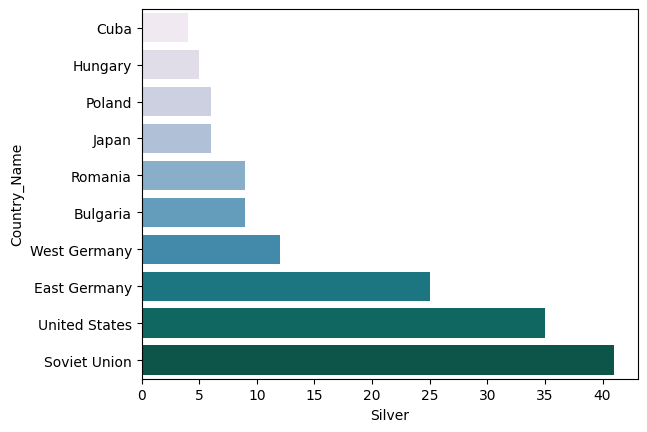

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1976.sort_values(['Silver']),palette="PuBuGn")

/tmp/ipython-input-2449611823.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1976.sort_values(['Bronze']),palette="PuBuGn")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

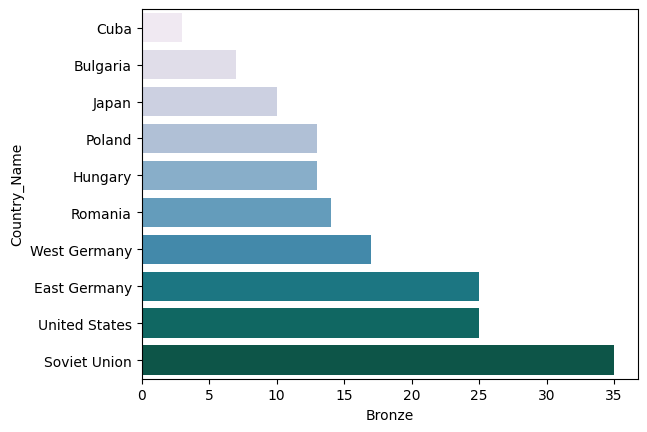

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1976.sort_values(['Bronze']),palette="PuBuGn")

/tmp/ipython-input-929655920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1976.sort_values(['Total']),palette="PuBuGn")


<Axes: xlabel='Total', ylabel='Country_Name'>

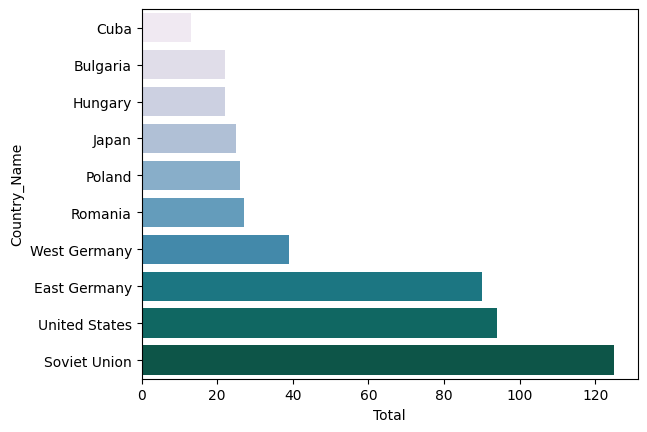

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1976.sort_values(['Total']),palette="PuBuGn")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Soviet Union-Moscow - 1980</center></h1>
</div>

The 1980 Summer Olympics (Russian: Летние Олимпийские игры 1980, romanized: Letniye Olimpiyskiye igry 1980), officially known as the Games of the XXII Olympiad (Russian: И́гры XXII Олимпиа́ды, romanized: Igry XXII Olimpiady) and commonly known as Moscow 1980 (Russian: Москва 1980), were an international multi-sport event held from 19 July to 3 August 1980 in Moscow, Soviet Union, in present-day Russia. The Games were the first to be staged in Eastern Europe, and remain the only Summer Olympics held there, as well as the first Olympic Games and only Summer Olympics to be held in a Slavic language-speaking country. They were also the only Summer Olympic Games to be held in a communist country until the 2008 Summer Olympics held in China. These were the final Olympic Games under the IOC Presidency of Michael Morris, 3rd Baron Killanin.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/Emblem_of_the_1980_Summer_Olympics.svg/180px-Emblem_of_the_1980_Summer_Olympics.svg.png)

Eighty nations were represented at the Moscow Games, the smallest number since 1956. Led by the United States, 66 countries boycotted the games entirely, because of the Soviet–Afghan War. Several alternative events were held outside of the Soviet Union. Some athletes from some of the boycotting countries (not included in the list of 66 countries that boycotted the games entirely) participated in the games under the Olympic Flag. The Soviet Union later boycotted the 1984 Summer Olympics in Los Angeles. The Soviet Union won the most gold and overall medals, with the USSR and East Germany winning 127 out of 203 available golds.

In [ ]:
medals_1980=medals[medals['year']=='1980'].drop(['year','Country_Code'],axis=1).head(10)
medals_1980

Country_Name Host_city  Host_country  Gold  Silver  Bronze  Total
239   Soviet Union    Moscow  Soviet Union    80      69      46    195
240   East Germany    Moscow  Soviet Union    47      37      42    126
241       Bulgaria    Moscow  Soviet Union     8      16      17     41
242           Cuba    Moscow  Soviet Union     8       7       5     20
243          Italy    Moscow  Soviet Union     8       3       4     15
244        Hungary    Moscow  Soviet Union     7      10      15     32
245        Romania    Moscow  Soviet Union     6       6      13     25
246         France    Moscow  Soviet Union     6       5       3     14
247  Great Britain    Moscow  Soviet Union     5       7       9     21
248         Poland    Moscow  Soviet Union     3      14      15     32

/tmp/ipython-input-1448264348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1980.sort_values(['Gold']),palette="PuBu_r")


<Axes: xlabel='Gold', ylabel='Country_Name'>

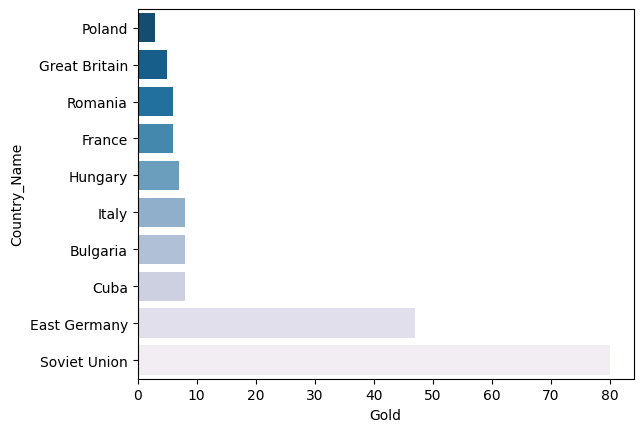

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1980.sort_values(['Gold']),palette="PuBu_r")

/tmp/ipython-input-3087338285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1980.sort_values(['Silver']),palette="PuBu_r")


<Axes: xlabel='Silver', ylabel='Country_Name'>

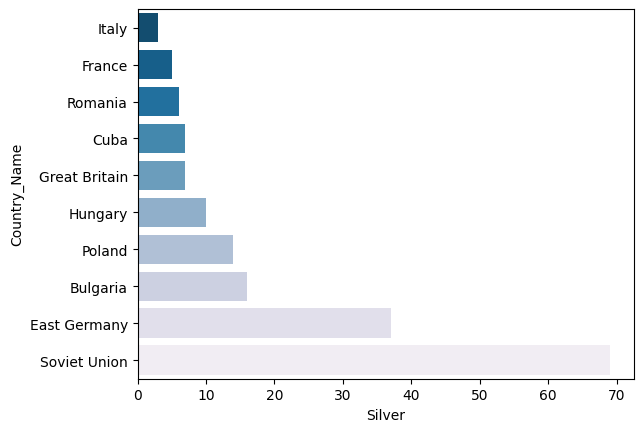

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1980.sort_values(['Silver']),palette="PuBu_r")

/tmp/ipython-input-3658862918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1980.sort_values(['Bronze']),palette="PuBu_r")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

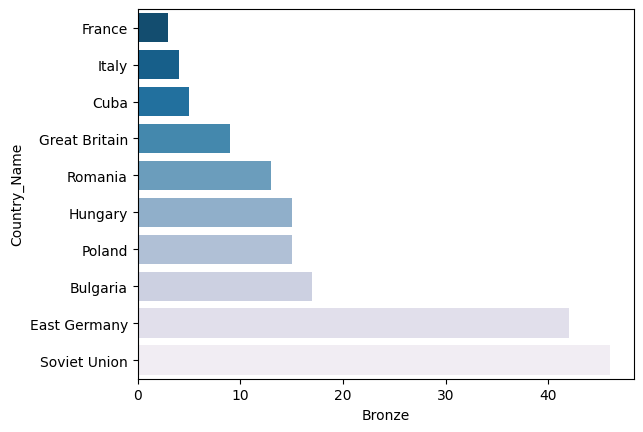

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1980.sort_values(['Bronze']),palette="PuBu_r")

/tmp/ipython-input-1489041347.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1980.sort_values(['Total']),palette="PuBu_r")


<Axes: xlabel='Total', ylabel='Country_Name'>

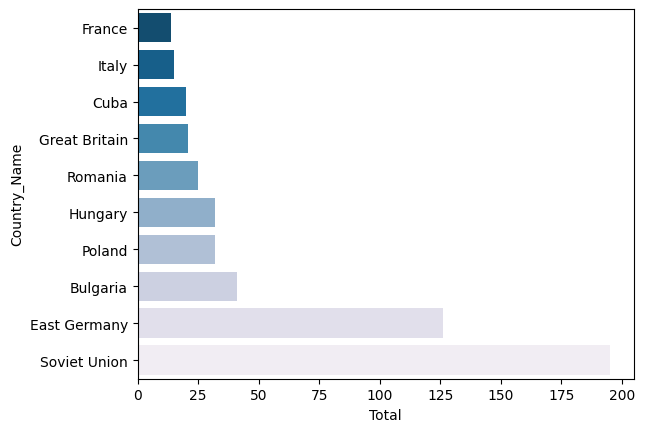

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1980.sort_values(['Total']),palette="PuBu_r")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals United States-Los Angeles - 1984</center></h1>
</div>

The 1984 Summer Olympics (officially known as the Games of the XXIII Olympiad and commonly known as Los Angeles 1984) was an international multi-sport event held from July 28 to August 12, 1984, mainly in Los Angeles, California, United States. It marked the second time that Los Angeles had hosted the Games, the first being in 1932. California was the home state of the incumbent U.S. President, Ronald Reagan, who officially opened the Games. The emblem of the 1984 Games, known as "Stars in Motion", featured red, white and blue stars arranged horizontally and struck through with alternating streaks. The official mascot was Sam the Olympic Eagle. These were the first Summer Olympic Games under the IOC presidency of Juan Antonio Samaranch.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/0/0c/1984_Summer_Olympics_logo.svg/330px-1984_Summer_Olympics_logo.svg.png)

The 1984 Games were boycotted by a total of fourteen Eastern Bloc countries, including the Soviet Union and East Germany, in response to the American-led boycott of the 1980 Summer Olympics in Moscow in protest of the Soviet invasion of Afghanistan; Romania was the only Eastern Bloc state that opted to attend the Games. Albania, Iran and Libya also chose to boycott the Games for unrelated reasons. Despite the field being depleted in certain sports due to the boycott, 140 National Olympic Committees took part, a record number at the time. The United States won the most gold and overall medals, followed by Romania and West Germany.

The 1984 Summer Olympics are widely considered to be the most financially successful modern Olympic Games, serving as an example on how to run a model Olympic games. As a result of low construction costs, due to the use of existing sport infrastructure, coupled with a reliance on private corporate funding, the 1984 Games generated a profit of over $250 million.

On July 18, 2009, a 25th-anniversary celebration of the 1984 Olympic Games was held at the Los Angeles Memorial Coliseum. The celebration included a speech by former Los Angeles Olympic Organizing Committee president Peter Ueberroth, as well as a re-enactment of the lighting of the Olympic cauldron. Los Angeles will host the Summer Olympics for the third time in 2028.

In [ ]:
medals_1984=medals[medals['year']=='1984'].drop(['year','Country_Code'],axis=1).head(10)
medals_1984

Country_Name    Host_city   Host_country  Gold  Silver  Bronze  Total
192  United States  Los Angeles  United States    83      61      30    174
193        Romania  Los Angeles  United States    20      16      17     53
194   West Germany  Los Angeles  United States    17      19      23     59
195          China  Los Angeles  United States    15       8       9     32
196          Italy  Los Angeles  United States    14       6      12     32
197         Canada  Los Angeles  United States    10      18      16     44
198          Japan  Los Angeles  United States    10       8      14     32
199    New Zealand  Los Angeles  United States     8       1       2     11
200     Yugoslavia  Los Angeles  United States     7       4       7     18
201    South Korea  Los Angeles  United States     6       6       7     19

/tmp/ipython-input-3577824983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1984.sort_values(['Gold']),palette="PuOr")


<Axes: xlabel='Gold', ylabel='Country_Name'>

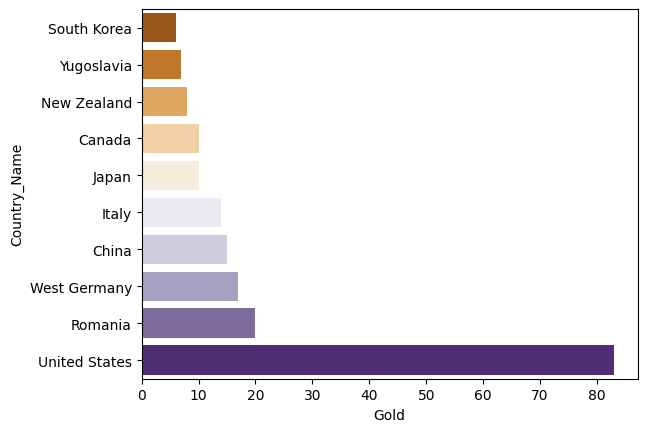

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1984.sort_values(['Gold']),palette="PuOr")

/tmp/ipython-input-2715272591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1984.sort_values(['Silver']),palette="PuOr")


<Axes: xlabel='Silver', ylabel='Country_Name'>

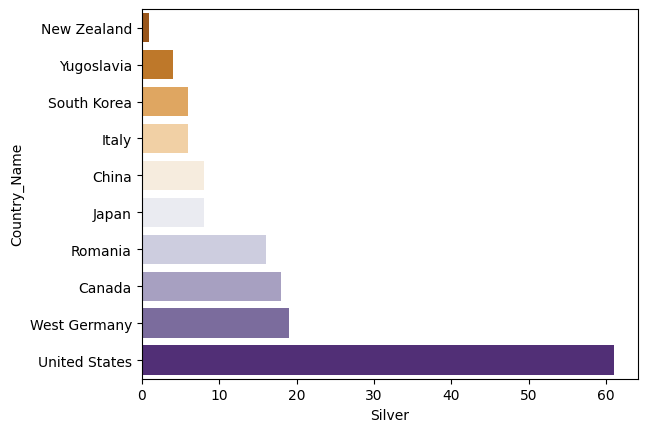

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1984.sort_values(['Silver']),palette="PuOr")

/tmp/ipython-input-2612163068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1984.sort_values(['Bronze']),palette="PuOr")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

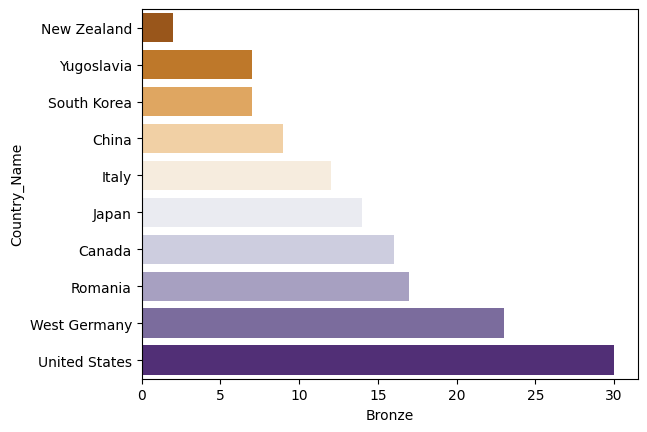

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1984.sort_values(['Bronze']),palette="PuOr")

/tmp/ipython-input-1672137399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1984.sort_values(['Total']),palette="PuOr")


<Axes: xlabel='Total', ylabel='Country_Name'>

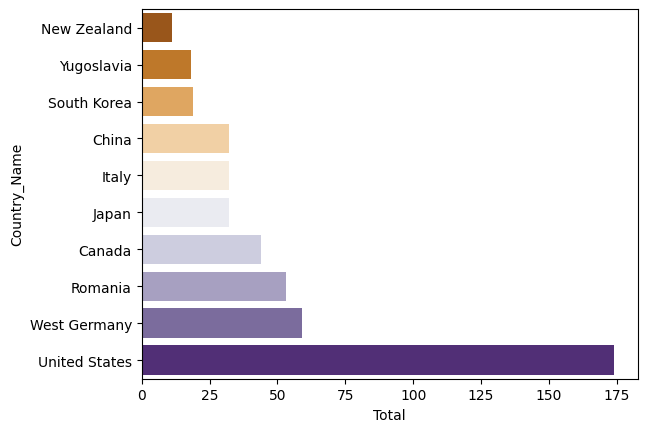

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1984.sort_values(['Total']),palette="PuOr")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals South Korea-Seoul - 1988</center></h1>
</div>

The 1988 Summer Olympics (Korean: 1988년 하계 올림픽; RR: 1988nyeon Hagye Ollimpig), officially known as the Games of the XXIV Olympiad (Korean: 제24회 올림픽경기대회; RR: Je 24hoe Ollimpiggyeong-gidaehoe) and commonly known as Seoul 1988 (Korean: 서울 1988), was an international multi-sport event held from 17 September to 2 October 1988 in Seoul, South Korea. 159 nations were represented at the games by a total of 8,391 athletes (6,197 men and 2,194 women). 237 events were held and 27,221 volunteers helped to prepare the Olympics.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/d/d6/1988_Summer_Olympics_logo.svg/225px-1988_Summer_Olympics_logo.svg.png)


The 1988 Seoul Olympics were the second summer Olympic Games held in Asia and the first time the Olympic Games were held in South Korea. As the host country, South Korea ranked fourth overall, winning 12 gold medals and 33 medals in the competition. 11,331 media (4,978 written press and 6,353 broadcasters) showed the Games all over the world. These were the last Olympic Games of the Cold War, as well as for the Soviet Union and East Germany, as both ceased to exist before the next Olympic Games in 1992. The Soviet Union utterly dominated the medal count, winning 55 gold and 132 total medals. The results that got closest to that medal haul are China's 48 gold medals in 2008 and USA's 121 total medals in 2016.


In [ ]:
medals_1988=medals[medals['year']=='1988'].drop(['year','Country_Code'],axis=1).head(10)
medals_1988

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
1142   Soviet Union     Seoul  South Korea    55      31      46    132
1143   East Germany     Seoul  South Korea    37      35      30    102
1144  United States     Seoul  South Korea    36      31      27     94
1145    South Korea     Seoul  South Korea    12      10      11     33
1146   West Germany     Seoul  South Korea    11      14      15     40
1147        Hungary     Seoul  South Korea    11       6       6     23
1148       Bulgaria     Seoul  South Korea    10      12      13     35
1149        Romania     Seoul  South Korea     7      11       6     24
1150         France     Seoul  South Korea     6       4       6     16
1151          Italy     Seoul  South Korea     6       4       4     14

/tmp/ipython-input-530075942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1988.sort_values(['Gold']),palette="winter")


<Axes: xlabel='Gold', ylabel='Country_Name'>

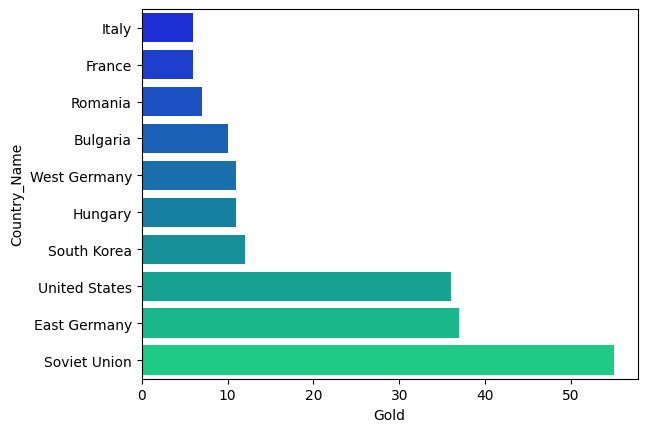

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1988.sort_values(['Gold']),palette="winter")

/tmp/ipython-input-1010164332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1988.sort_values(['Silver']),palette="winter")


<Axes: xlabel='Silver', ylabel='Country_Name'>

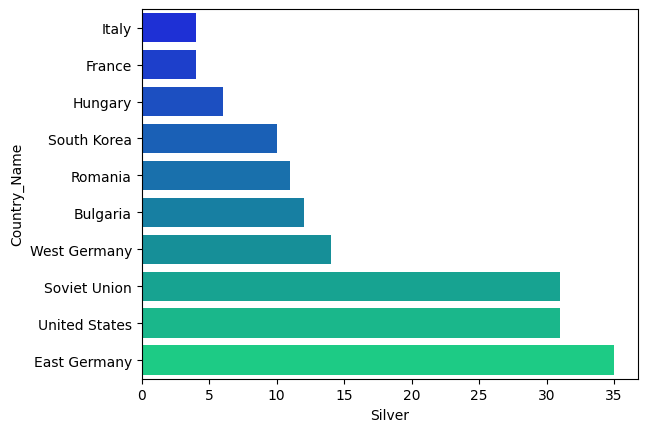

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1988.sort_values(['Silver']),palette="winter")

/tmp/ipython-input-3455320400.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1988.sort_values(['Bronze']),palette="winter")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

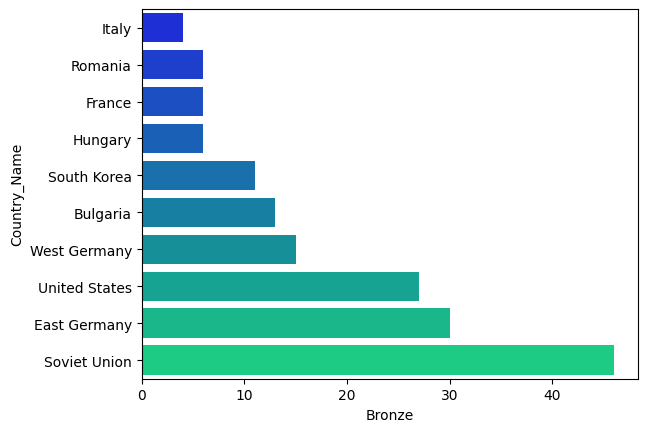

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1988.sort_values(['Bronze']),palette="winter")

/tmp/ipython-input-2035079896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1988.sort_values(['Total']),palette="winter")


<Axes: xlabel='Total', ylabel='Country_Name'>

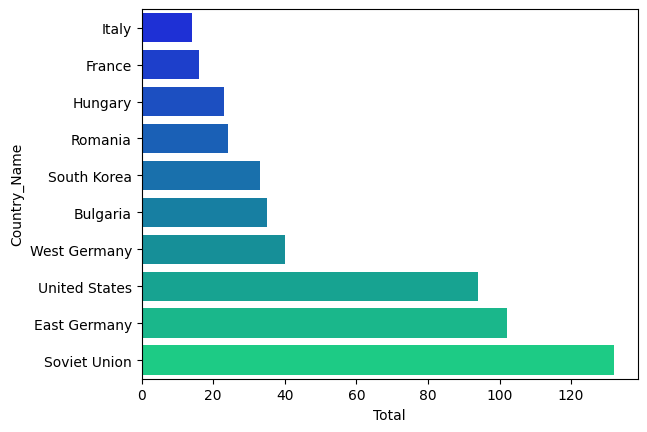

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1988.sort_values(['Total']),palette="winter")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Spain-Barcelona - 1992</center></h1>
</div>

The 1992 Summer Olympics (Spanish: Juegos Olímpicos de Verano de 1992, Catalan: Jocs Olímpics d'estiu de 1992), officially known as the Games of the XXV Olympiad (Spanish: Juegos de la XXV Olimpiada, Catalan: Jocs de la XXV Olimpíada) and commonly known as Barcelona '92, were an international multi-sport event held from 25 July to 9 August 1992 in Barcelona, Catalonia, Spain. This was the first and only Summer Olympics held in Spain. Beginning in 1994, the International Olympic Committee decided to hold the Summer and Winter Olympics in alternating even-numbered years. 1992 was the last year in which both the Summer and Winter Olympics were staged.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/7/7a/1992_Summer_Olympics_logo.svg/300px-1992_Summer_Olympics_logo.svg.png)

The 1992 Summer Games were the first since the end of the Cold War, and the first unaffected by boycotts since the 1972 Summer Games.

1992 was also the first year South Africa was re-invited to the Olympic Games by the International Olympic Committee, after a 32-year ban from participating in international sport.
The Unified Team (made up by the former Soviet republics without the Baltic states) topped the medal table, winning 45 gold and 112 overall medals.

In [ ]:
medals_1992=medals[medals['year']=='1992'].drop(['year','Country_Code'],axis=1).head(10)
medals_1992

Country_Name  Host_city Host_country  Gold  Silver  Bronze  Total
1078   Unified Team  Barcelona        Spain    45      38      29    112
1079  United States  Barcelona        Spain    37      34      37    108
1080        Germany  Barcelona        Spain    33      21      28     82
1081          China  Barcelona        Spain    16      22      16     54
1082           Cuba  Barcelona        Spain    14       6      11     31
1083          Spain  Barcelona        Spain    13       7       2     22
1084    South Korea  Barcelona        Spain    12       5      12     29
1085        Hungary  Barcelona        Spain    11      12       7     30
1086         France  Barcelona        Spain     8       5      16     29
1087      Australia  Barcelona        Spain     7       9      11     27

/tmp/ipython-input-2887527960.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1992.sort_values(['Gold']),palette="Purples")


<Axes: xlabel='Gold', ylabel='Country_Name'>

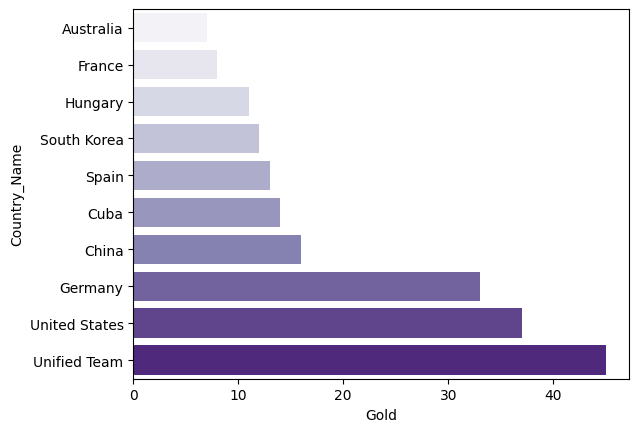

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1992.sort_values(['Gold']),palette="Purples")

/tmp/ipython-input-2706917184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1992.sort_values(['Silver']),palette="Purples")


<Axes: xlabel='Silver', ylabel='Country_Name'>

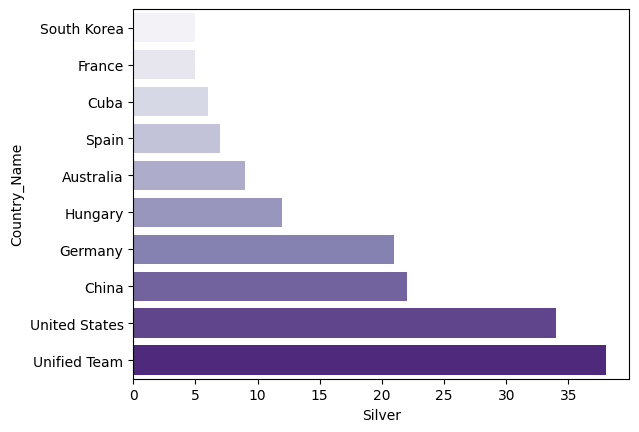

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1992.sort_values(['Silver']),palette="Purples")

/tmp/ipython-input-682294084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1992.sort_values(['Bronze']),palette="Purples")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

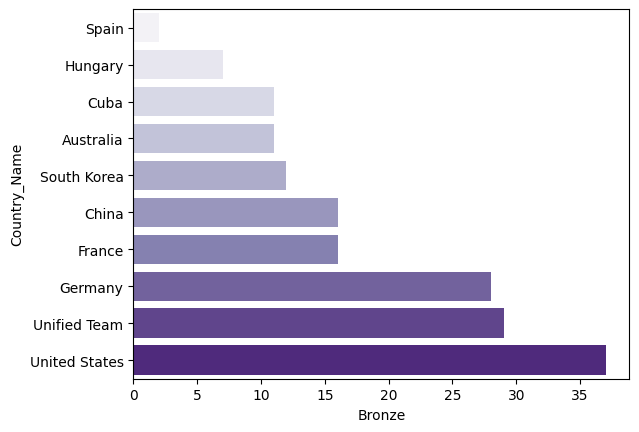

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1992.sort_values(['Bronze']),palette="Purples")

/tmp/ipython-input-1800186750.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1992.sort_values(['Total']),palette="Purples")


<Axes: xlabel='Total', ylabel='Country_Name'>

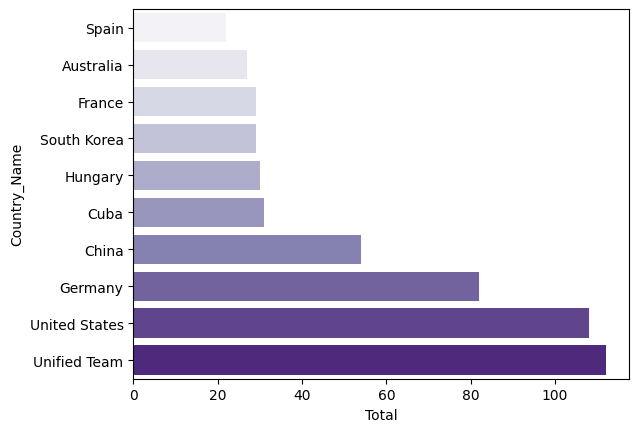

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1992.sort_values(['Total']),palette="Purples")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals United States-Atlanta - 1996</center></h1>
</div>

The 1996 Summer Olympics, officially known as the Games of the XXVI Olympiad, commonly known as Atlanta 1996, and also referred to as the Centennial Olympic Games, was an international multi-sport event held from July 19 to August 4, 1996, in Atlanta, Georgia, United States. The fourth Summer Olympics to be hosted by the United States, these Games marked the centennial of the 1896 Summer Olympics in Athens—the inaugural edition of the modern Olympic Games. This was the first Summer Olympics since 1924 to be held in a different year from a Winter Olympics, under a new IOC practice implemented in 1994 to hold the Summer and Winter Games in alternating, even-numbered years. This is also the last Summer Olympics to be held in North America until 2028, when Los Angeles will host the games for the third time.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/4/4e/1996_Summer_Olympics_logo.svg/197px-1996_Summer_Olympics_logo.svg.png)

More than 10,000 athletes from 197 National Olympic Committees competed in 26 sports, including the Olympic debuts of beach volleyball, mountain biking, and softball, as well as the new disciplines of lightweight rowing, women's fencing, a team rhythmic gymnastics event, and women's association football. A total of 24 countries made their Summer Olympic debuts in Atlanta, including 11 former Soviet republics participating for the first time as independent nations. With a total of 101 medals, the United States topped the medal table for the first time since 1984 (and for the first time since 1968 in a non-boycotted Summer Olympics), also winning the most gold (44) and silver (32) medals out of all the participating nations. Notable performances during the competition included those of: Andre Agassi, who became the first men's singles tennis player to combine an Olympic gold medal with a career Grand Slam (completed in 1999); Donovan Bailey, who set a new world record of 9.84 for the men's 100 metres; Lilia Podkopayeva, who became the second gymnast to win an individual event gold medal after winning the all-around title in the same Olympics, and the Magnificent Seven who dramatically won the first ever U.S. gold medal in the Women's artistic gymnastics team all-around.

In [ ]:
medals_1996=medals[medals['year']=='1996'].drop(['year','Country_Code'],axis=1).head(10)
medals_1996

Country_Name Host_city   Host_country  Gold  Silver  Bronze  Total
999   United States   Atlanta  United States    44      32      25    101
1000         Russia   Atlanta  United States    26      21      16     63
1001        Germany   Atlanta  United States    20      18      27     65
1002          China   Atlanta  United States    16      22      12     50
1003         France   Atlanta  United States    15       7      15     37
1004          Italy   Atlanta  United States    13      10      12     35
1005      Australia   Atlanta  United States     9       9      23     41
1006           Cuba   Atlanta  United States     9       8       8     25
1007        Ukraine   Atlanta  United States     9       2      12     23
1008    South Korea   Atlanta  United States     7      15       5     27

/tmp/ipython-input-192468596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_1996.sort_values(['Gold']),palette="RdBu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

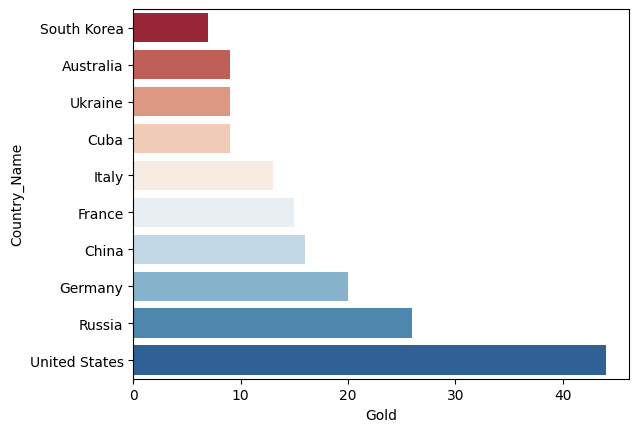

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_1996.sort_values(['Gold']),palette="RdBu")

/tmp/ipython-input-2804803269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_1996.sort_values(['Silver']),palette="RdBu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

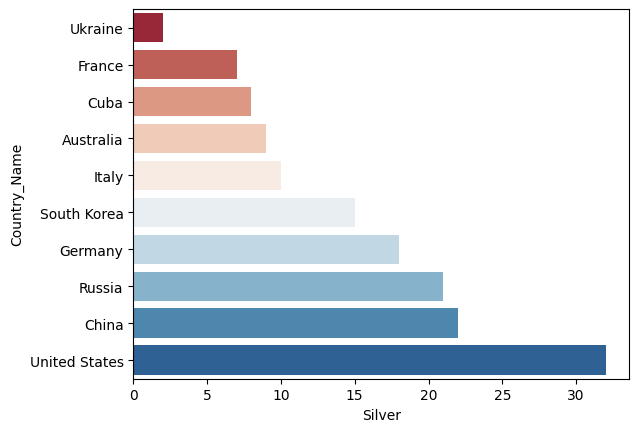

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_1996.sort_values(['Silver']),palette="RdBu")

/tmp/ipython-input-3483092238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_1996.sort_values(['Bronze']),palette="RdBu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

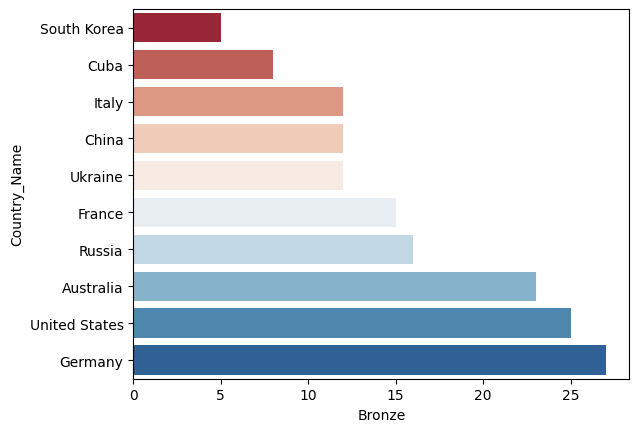

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_1996.sort_values(['Bronze']),palette="RdBu")

/tmp/ipython-input-3723143479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_1996.sort_values(['Total']),palette="RdBu")


<Axes: xlabel='Total', ylabel='Country_Name'>

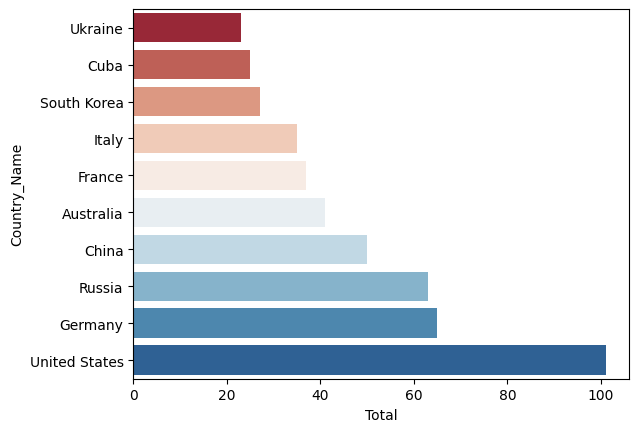

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_1996.sort_values(['Total']),palette="RdBu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Australia-Sydney - 2000</center></h1>
</div>

The 2000 Summer Olympics (officially known as the Games of the XXVII Olympiad and commonly known as Sydney 2000, the Millennium Olympic Games or the Games of the New Millennium) was an international multi-sport event held from 15 September to 1 October 2000 in Sydney, New South Wales, Australia. It was the second time the Summer Olympics were held in Australia, and in the Southern Hemisphere, the first being in Melbourne, Victoria, in 1956.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/8/81/2000_Summer_Olympics_logo.svg/287px-2000_Summer_Olympics_logo.svg.png)

Sydney was selected as the host city for the 2000 Games in 1993. Teams from 199 countries participated.
James Mossop of the Electronic Telegraph called the Games "such a success that any city considering bidding for future Olympics must be wondering how it can reach the standards set by Sydney", while Jack Todd in the Montreal Gazette suggested that the "IOC should quit while it's ahead. Admit there can never be a better Olympic Games, and be done with it," as "Sydney was both exceptional and the best".

These games would provide the inspiration for London’s winning bid for the 2012 Olympic Games in 2005 and in preparing for the 2012 Olympic Games in London, Lord Coe declared the Sydney Games the "benchmark for the spirit of the Games, unquestionably" and admitting that the London organising committee "attempted in a number of ways to emulate what the Sydney Organising Committee did." These were the final Olympic Games under the IOC presidency of Juan Antonio Samaranch before the arrival of his successor, Jacques Rogge. These were also the second Olympic Games to be held in spring and is to date the most recent games not to be held in its more traditional July or August summer slot.

The final medal tally was led by the United States, followed by Russia and China with host Australia at fourth place overall.

In [ ]:
medals_2000=medals[medals['year']=='2000'].drop(['year','Country_Code'],axis=1).head(10)
medals_2000

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
919  United States    Sydney    Australia    37      24      32     93
920         Russia    Sydney    Australia    32      28      29     89
921          China    Sydney    Australia    28      16      14     58
922      Australia    Sydney    Australia    16      25      17     58
923        Germany    Sydney    Australia    13      17      26     56
924         France    Sydney    Australia    13      14      11     38
925          Italy    Sydney    Australia    13       8      13     34
926    Netherlands    Sydney    Australia    12       9       4     25
927           Cuba    Sydney    Australia    11      11       7     29
928  Great Britain    Sydney    Australia    11      10       7     28

/tmp/ipython-input-2851524197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2000.sort_values(['Gold']),palette="RdGy")


<Axes: xlabel='Gold', ylabel='Country_Name'>

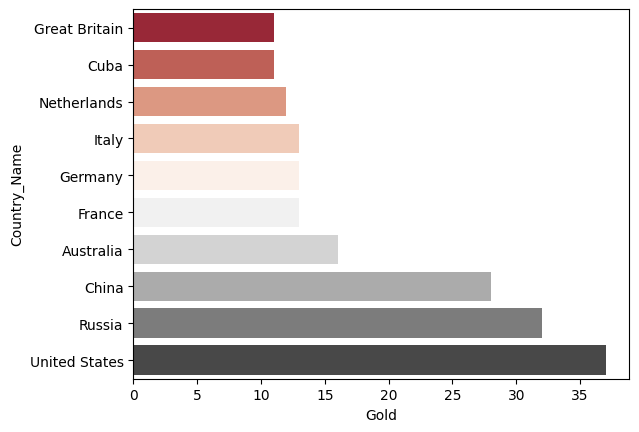

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2000.sort_values(['Gold']),palette="RdGy")

/tmp/ipython-input-3264141472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2000.sort_values(['Silver']),palette="RdGy")


<Axes: xlabel='Silver', ylabel='Country_Name'>

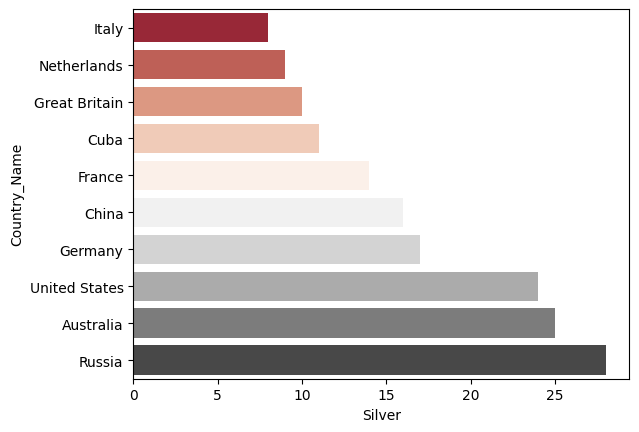

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2000.sort_values(['Silver']),palette="RdGy")

/tmp/ipython-input-4154478695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2000.sort_values(['Bronze']),palette="RdGy")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

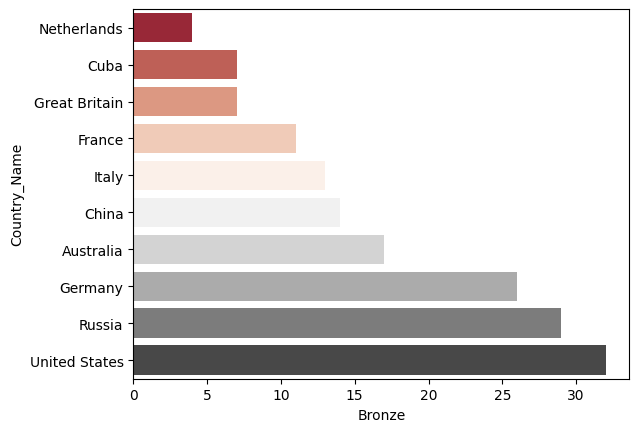

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2000.sort_values(['Bronze']),palette="RdGy")

/tmp/ipython-input-1430408725.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2000.sort_values(['Total']),palette="RdGy")


<Axes: xlabel='Total', ylabel='Country_Name'>

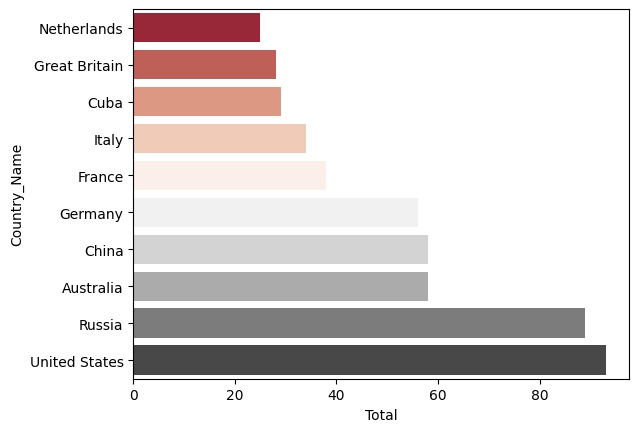

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2000.sort_values(['Total']),palette="RdGy")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Greece-Athens - 2004</center></h1>
</div>

The 2004 Summer Olympics (Greek: Θερινοί Ολυμπιακοί Αγώνες 2004, Therinoí Olympiakoí Agónes 2004),[2] officially known as the Games of the XXVIII Olympiad (Greek: Αγώνες της 28ης Ολυμπιάδας, Agónes tis 28is Olympiádas) and commonly known as Athens 2004 (Greek: Αθήνα 2004), was an international multi-sport event held from 13 to 29 August 2004 in Athens, Greece. The Games saw 10,625 athletes compete, some 600 more than expected, accompanied by 5,501 team officials from 201 countries. There were 301 medal events in 28 different sports. Athens 2004 marked the first time since the 1996 Summer Olympics that all countries with a National Olympic Committee were in attendance, and also saw the return of the Olympic Games to the city where they began. Having previously hosted the first modern Olympics in 1896, Athens became one of only four cities at the time to have hosted the Summer Olympic Games on two occasions (together with Paris, London and Los Angeles).

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/1/16/2004_Summer_Olympics_logo.svg/215px-2004_Summer_Olympics_logo.svg.png)

A new medal obverse was introduced at these Games, replacing the design by Giuseppe Cassioli that had been used since 1928. The new design features the Panathenaic Stadium in Athens. This rectified the long-running mistake of using a depiction of the Roman Colosseum rather than a Greek venue.

The 2004 Olympic Games were hailed as "unforgettable dream games" by IOC President Jacques Rogge, in his first Olympic appearance as the president since succeeding Juan Antonio Samaranch after the 2000 Summer Olympics, and left Athens with a significantly improved infrastructure, including a new airport, ring road, and subway system. There have been arguments (mostly in popular media) regarding the cost of the 2004 Summer Games and their possible contribution to the 2010–18 Greek government-debt crisis, but there is little or no evidence for such a correlation. The 2004 Games were generally deemed to be a success, with the rising standard of competition amongst nations across the world. The final medal tally was led by the United States, followed by China and Russia with Greece at 15th place. Several world and Olympic records were broken during these Games.

In [ ]:
medals_2004=medals[medals['year']=='2004'].drop(['year','Country_Code'],axis=1).head(10)
medals_2004

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
845  United States    Athens       Greece    36      39      26    101
846          China    Athens       Greece    32      17      14     63
847         Russia    Athens       Greece    28      26      36     90
848      Australia    Athens       Greece    17      16      17     50
849          Japan    Athens       Greece    16       9      12     37
850        Germany    Athens       Greece    13      16      20     49
851         France    Athens       Greece    11       9      13     33
852          Italy    Athens       Greece    10      11      11     32
853    South Korea    Athens       Greece     9      12       9     30
854  Great Britain    Athens       Greece     9       9      12     30

/tmp/ipython-input-1672648015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2004.sort_values(['Gold']),palette="RdPu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

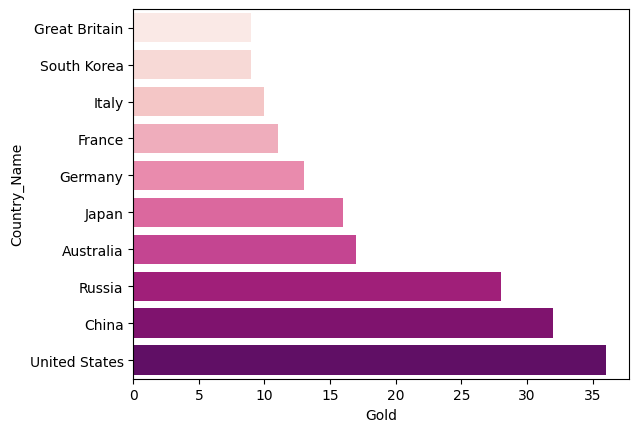

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2004.sort_values(['Gold']),palette="RdPu")

/tmp/ipython-input-2780459816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2004.sort_values(['Silver']),palette="RdPu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

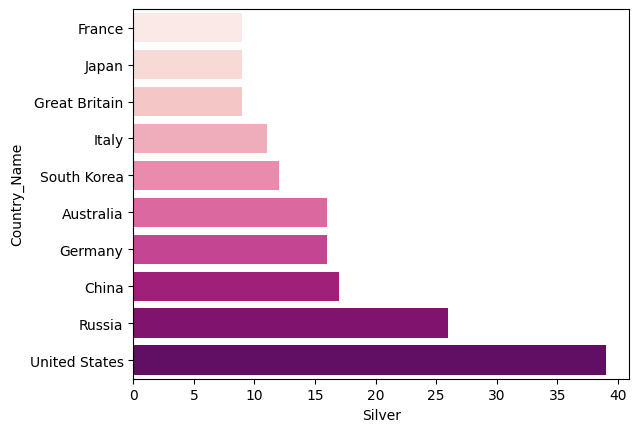

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2004.sort_values(['Silver']),palette="RdPu")

/tmp/ipython-input-804619767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2004.sort_values(['Bronze']),palette="RdPu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

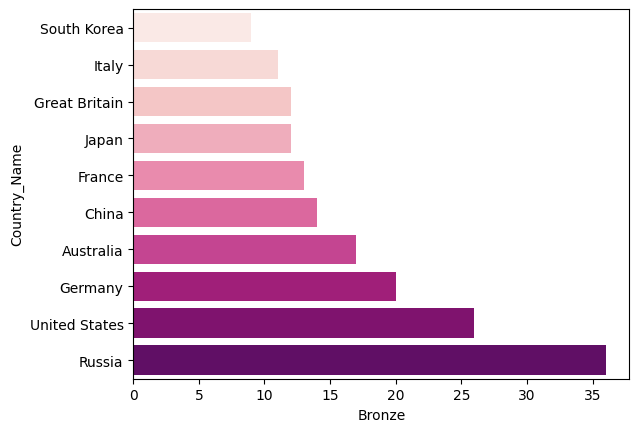

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2004.sort_values(['Bronze']),palette="RdPu")

/tmp/ipython-input-1636740660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2004.sort_values(['Total']),palette="RdPu")


<Axes: xlabel='Total', ylabel='Country_Name'>

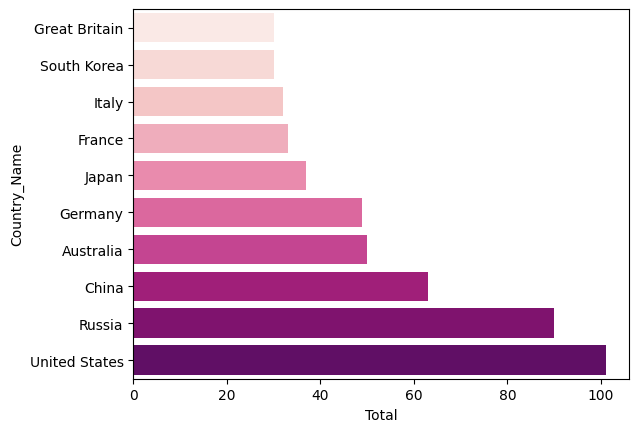

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2004.sort_values(['Total']),palette="RdPu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals China-Beijing - 2008</center></h1>
</div>

The 2008 Summer Olympics (Chinese: 2008年夏季奥运会; pinyin: Liǎng qiān bā Nián Xiàjì Àoyùnhuì), officially known as the Games of the XXIX Olympiad (Chinese: 第二十九届夏季奥林匹克运动会; pinyin: Dì Èrshíjiǔ Jiè Xiàjì Àolínpǐkè Yùndònghuì) and commonly known as Beijing 2008 (Chinese: 北京2008; pinyin: Běijīng èr líng líng bā), was an international multisport event held from 8 to 24 August 2008 in Beijing, China. A total of 10,942 athletes from 204 National Olympic Committees (NOCs) competed in 28 sports and 302 events (one event more than those scheduled for the 2004 Summer Olympics). This was the first time China had hosted the Olympic Games and the third time the Summer Olympic Games had been held in East Asia, following the 1964 Olympics in Tokyo, Japan, and the 1988 Olympics in Seoul, South Korea. These were also the second Summer Olympic Games to be held in a communist state, the first being 1980 Summer Olympics in the Soviet Union (present day Russia).

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/8/87/2008_Summer_Olympics_logo.svg/248px-2008_Summer_Olympics_logo.svg.png)

Beijing was awarded the 2008 Games over four competitors on 13 July 2001, having won a majority of votes from members of the International Olympic Committee (IOC) after two rounds of voting. The Government of the People's Republic of China promoted the Games and invested heavily in new facilities and transport systems. 37 venues were used to host the events, including twelve constructed specifically for the 2008 Games. The equestrian events were held in Hong Kong, making it the third Olympics for which the events were held under the jurisdiction of two different NOCs. The sailing events were contested in Qingdao, while the football events took place across several different cities.

An unprecedented 87 countries won at least one medal during the Games. China won the most gold medals, with 48, and became the seventh different team to top an overall Summer Olympics medal tally, winning a total of 100 medals overall. The United States placed second in the gold medal tally but won the highest number of medals overall, with a total of 112. The third place in the gold medal tally was achieved by Russia.

In [ ]:
medals_2008=medals[medals['year']=='2008'].drop(['year','Country_Code'],axis=1).head(10)
medals_2008

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
758          China   Beijing        China    48      22      30    100
759  United States   Beijing        China    36      39      37    112
760         Russia   Beijing        China    24      13      23     60
761  Great Britain   Beijing        China    19      13      19     51
762        Germany   Beijing        China    16      11      14     41
763      Australia   Beijing        China    14      15      17     46
764    South Korea   Beijing        China    13      11       8     32
765          Japan   Beijing        China     9       8       8     25
766          Italy   Beijing        China     8       9      10     27
767         France   Beijing        China     7      16      20     43

/tmp/ipython-input-3208854487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2008.sort_values(['Gold']),palette="RdYlBu")


<Axes: xlabel='Gold', ylabel='Country_Name'>

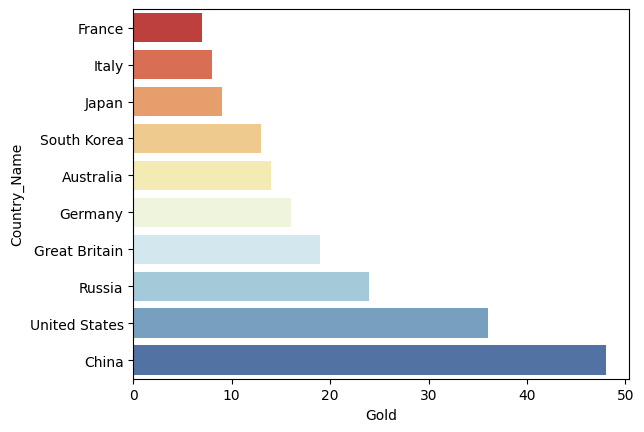

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2008.sort_values(['Gold']),palette="RdYlBu")

/tmp/ipython-input-775867840.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2008.sort_values(['Silver']),palette="RdYlBu")


<Axes: xlabel='Silver', ylabel='Country_Name'>

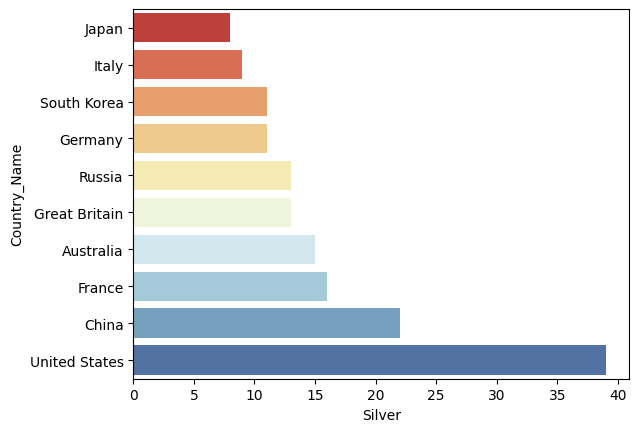

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2008.sort_values(['Silver']),palette="RdYlBu")

/tmp/ipython-input-3702957079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2008.sort_values(['Bronze']),palette="RdYlBu")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

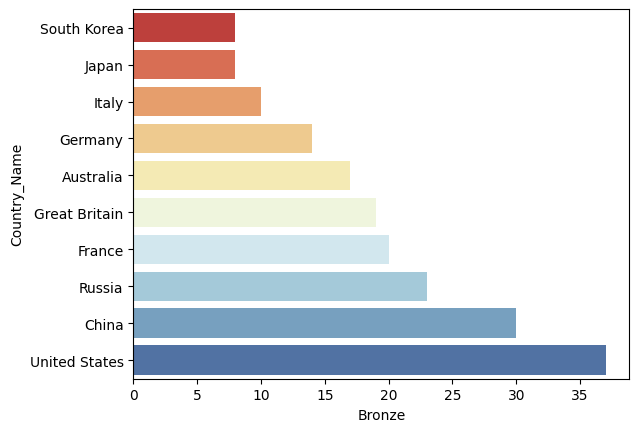

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2008.sort_values(['Bronze']),palette="RdYlBu")

/tmp/ipython-input-2202887189.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2008.sort_values(['Total']),palette="RdYlBu")


<Axes: xlabel='Total', ylabel='Country_Name'>

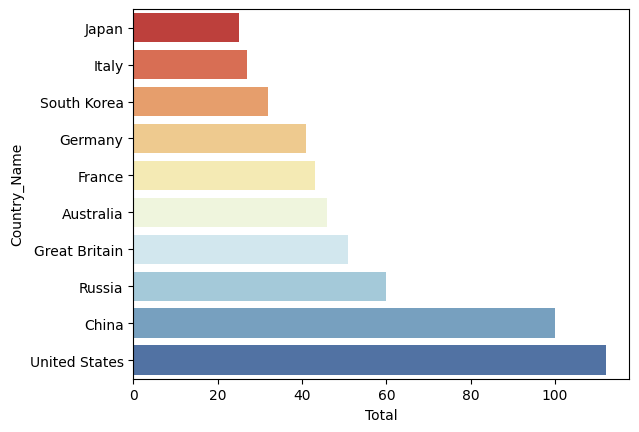

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2008.sort_values(['Total']),palette="RdYlBu")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Great Britain-London - 2012</center></h1>
</div>

The 2012 Summer Olympics (officially known as the Games of the XXX Olympiad and commonly known as London 2012) was an international multi-sport event held from 27 July to 12 August 2012 in London, England, United Kingdom. The first event, the group stage in women's football, began on 25 July at the Millennium Stadium in Cardiff, followed by the opening ceremony on 27 July. 10,768 athletes from 204 National Olympic Committees (NOCs) participated.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/d/de/2012_Summer_Olympics_logo.svg/300px-2012_Summer_Olympics_logo.svg.png)


Following a bid headed by former Olympic champion Sebastian Coe and the incumbent Mayor of London Ken Livingstone, London was selected as the host city on 6 July 2005 during the 117th IOC Session in Singapore, defeating bids from Moscow, New York City, Madrid, and Paris. London became the first city to host the modern Olympics three times, having previously hosted the Summer Games in 1908 and in 1948. Construction for the Games involved considerable redevelopment, with an emphasis on sustainability. The main focus was a new 200-hectare (490-acre) Olympic Park, constructed on a former industrial site at Stratford, East London. The Games also made use of venues that already existed before the bid.

The United States topped the medal table, winning the most gold medals (46) and the highest number of medals overall (104); China finished second with a total of 91 medals (38 gold) and Great Britain came third with 65 medals overall (29 gold). Michael Phelps became the most decorated Olympic athlete of all time, winning his 22nd medal. Saudi Arabia, Qatar, and Brunei entered female athletes for the first time, so that every currently eligible country has sent a female competitor to at least one Olympic Games. Women's boxing was included for the first time, thus the Games became the first at which every sport had female competitors.


In [ ]:
medals_2012=medals[medals['year']=='2012'].drop(['year','Country_Code'],axis=1).head(10)
medals_2012

Country_Name Host_city   Host_country  Gold  Silver  Bronze  Total
672  United States    London  Great Britain    46      28      30    104
673          China    London  Great Britain    38      31      22     91
674  Great Britain    London  Great Britain    29      17      19     65
675         Russia    London  Great Britain    20      20      28     68
676    South Korea    London  Great Britain    13       9       8     30
677        Germany    London  Great Britain    11      20      13     44
678         France    London  Great Britain    11      11      13     35
679      Australia    London  Great Britain     8      15      12     35
680          Italy    London  Great Britain     8       9      11     28
681        Hungary    London  Great Britain     8       4       6     18

/tmp/ipython-input-1268179693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2012.sort_values(['Gold']),palette="RdYlGn")


<Axes: xlabel='Gold', ylabel='Country_Name'>

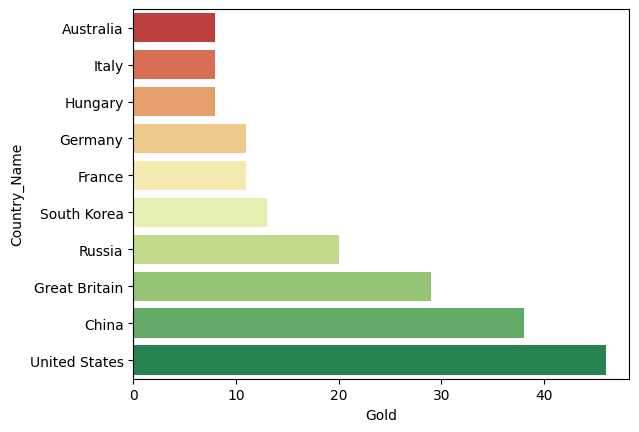

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2012.sort_values(['Gold']),palette="RdYlGn")

/tmp/ipython-input-1728521651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2012.sort_values(['Silver']),palette="RdYlGn")


<Axes: xlabel='Silver', ylabel='Country_Name'>

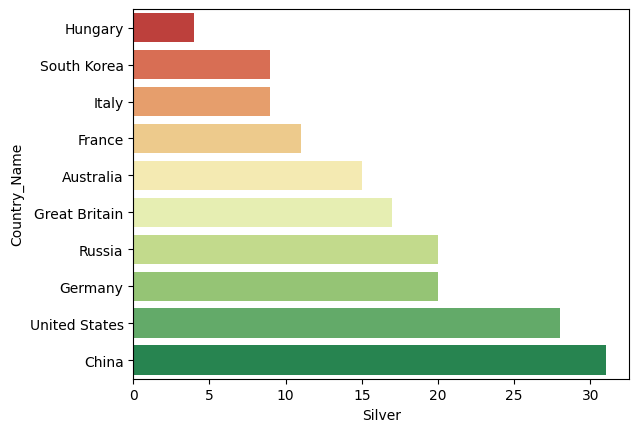

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2012.sort_values(['Silver']),palette="RdYlGn")

/tmp/ipython-input-4085108147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2012.sort_values(['Bronze']),palette="RdYlGn")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

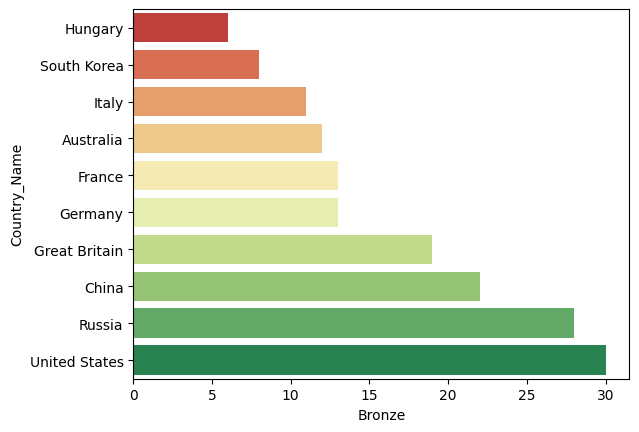

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2012.sort_values(['Bronze']),palette="RdYlGn")

/tmp/ipython-input-516773756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2012.sort_values(['Total']),palette="RdYlGn")


<Axes: xlabel='Total', ylabel='Country_Name'>

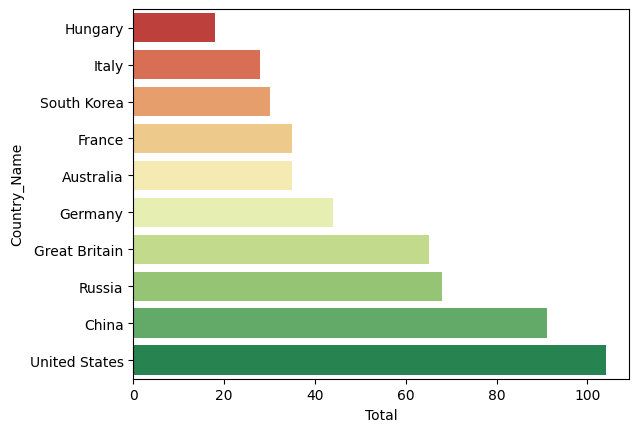

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2012.sort_values(['Total']),palette="RdYlGn")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Brazil-Rio de Janeiro - 2016</center></h1>
</div>

The 2016 Summer Olympics (Portuguese: Jogos Olímpicos de Verão de 2016), officially known as the Games of the XXXI Olympiad (Portuguese: Jogos da XXXI Olimpíada) and commonly known as Rio 2016, was an international multi-sport event held from 5 to 21 August 2016 in Rio de Janeiro, Brazil, with preliminary events in some sports beginning on 3 August. Rio was announced as the host city at the 121st IOC Session in Copenhagen, Denmark, on 2 October 2009.

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/d/df/2016_Summer_Olympics_logo.svg/267px-2016_Summer_Olympics_logo.svg.png)


More than 11,000 athletes from 207 nations took part in the 2016 Games, including first-time entrants Kosovo, South Sudan, and the Refugee Olympic Team. With 306 sets of medals, the Games featured 28 Olympic sports, including rugby sevens and golf, which were added to the Olympic program in 2009. These sporting events took place at 33 venues in the host city and at five separate venues in the Brazilian cities of São Paulo, Belo Horizonte, Salvador, Brasília, and Manaus.

These were the first Olympic Games to be held in South America, as well as the first to be held in a Portuguese-speaking country, the first summer edition to be held entirely in the host country's winter season, the first since 1968 to be held in Latin America, and the first since 2000 to be held in the Southern Hemisphere. These were the first Summer Olympics to take place under the International Olympic Committee (IOC) presidency of Thomas Bach.

The United States topped the medal table, winning the most gold medals (46) and the highest number of medals overall (121); the US team also won its 1,000th Summer Olympic gold medal overall. Great Britain finished second and became the first country in modern Olympic history to increase its tally of medals in the Olympiad immediately after being host nation. China finished third in the medal table. Host nation Brazil won seven gold medals and 19 medals, its best result at any Olympics, finishing in thirteenth place. Bahrain, Fiji, Ivory Coast, Jordan, Kosovo, Puerto Rico, Singapore, Tajikistan, and Vietnam each won their first gold medals, as did the group of Independent Olympic Athletes (from Kuwait).

In [ ]:
medals_2016=medals[medals['year']=='2016'].drop(['year','Country_Code'],axis=1).head(10)
medals_2016

Country_Name       Host_city Host_country  Gold  Silver  Bronze  Total
586  United States  Rio de Janeiro       Brazil    46      37      38    121
587  Great Britain  Rio de Janeiro       Brazil    27      23      17     67
588          China  Rio de Janeiro       Brazil    26      18      26     70
589         Russia  Rio de Janeiro       Brazil    19      17      20     56
590        Germany  Rio de Janeiro       Brazil    17      10      15     42
591          Japan  Rio de Janeiro       Brazil    12       8      21     41
592         France  Rio de Janeiro       Brazil    10      18      14     42
593    South Korea  Rio de Janeiro       Brazil     9       3       9     21
594          Italy  Rio de Janeiro       Brazil     8      12       8     28
595      Australia  Rio de Janeiro       Brazil     8      11      10     29

/tmp/ipython-input-1440386735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2016.sort_values(['Gold']),palette="Reds")


<Axes: xlabel='Gold', ylabel='Country_Name'>

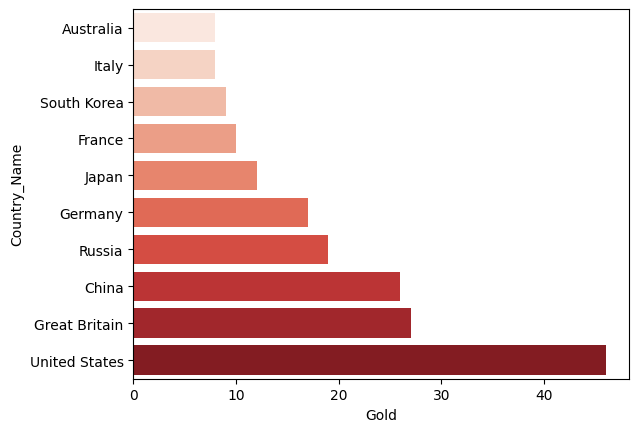

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2016.sort_values(['Gold']),palette="Reds")

/tmp/ipython-input-394287757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2016.sort_values(['Silver']),palette="Reds")


<Axes: xlabel='Silver', ylabel='Country_Name'>

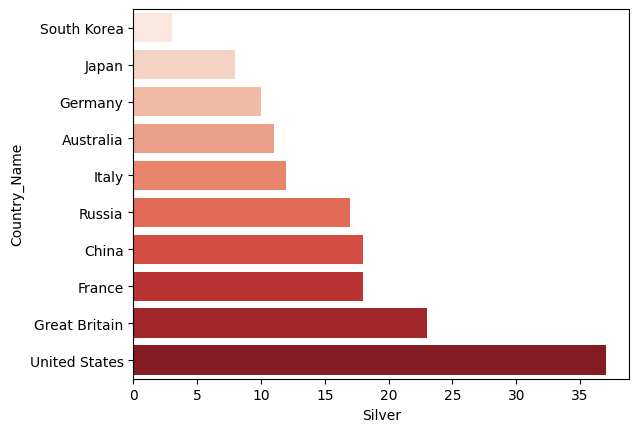

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2016.sort_values(['Silver']),palette="Reds")

/tmp/ipython-input-719549802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2016.sort_values(['Bronze']),palette="Reds")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

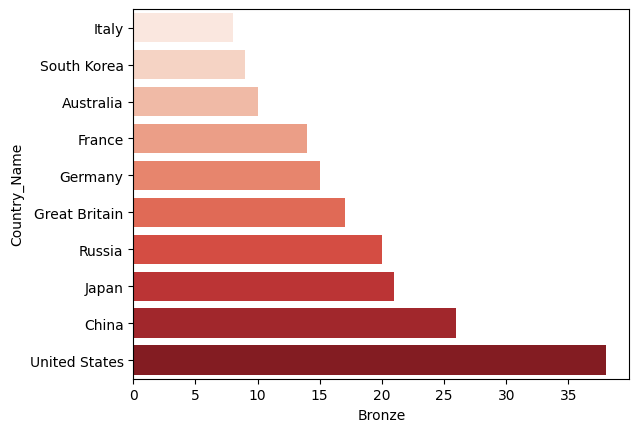

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2016.sort_values(['Bronze']),palette="Reds")

/tmp/ipython-input-1796030782.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2016.sort_values(['Total']),palette="Reds")


<Axes: xlabel='Total', ylabel='Country_Name'>

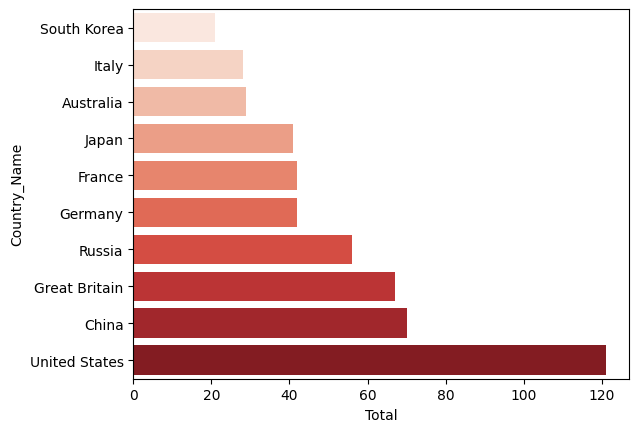

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2016.sort_values(['Total']),palette="Reds")

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Summer Olympic Medals Japan-Tokyo - 2020</center></h1>
</div>

The 2020 Summer Olympics (Japanese: 2020年夏季オリンピック, Hepburn: Nisen Nijū-nen Kaki Orinpikku), officially the Games of the XXXII Olympiad (第三十二回オリンピック競技大会, Dai Sanjūni-kai Orinpikku Kyōgi Taikai) and branded as Tokyo 2020 (東京2020, Tōkyō Nī Zero Nī Zero), was an international multi-sport event held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 2

![summer olympics](https://upload.wikimedia.org/wikipedia/en/thumb/1/1d/2020_Summer_Olympics_logo_new.svg/230px-2020_Summer_Olympics_logo_new.svg.png)

Tokyo was selected as the host city during the 125th IOC Session in Buenos Aires, Argentina, on 7 September 2013. Originally scheduled to take place from 24 July to 9 August 2020, the event was postponed to 2021 in March 2020 as a result of the COVID-19 pandemic, the first such instance in the history of the Olympic Games (previous games had been cancelled but not rescheduled).However, the event retained the Tokyo 2020 name for marketing and branding purposes. It was largely held behind closed doors with no public spectators permitted due to the declaration of a state of emergency in the Greater Tokyo Area in response to the pandemic. The Summer Paralympics will be held between 24 August and 5 September 2021, 16 days after the completion of the Olympics.

The 2020 Games were the fourth Olympic Games to be held in Japan, following the Tokyo 1964 (Summer), Sapporo 1972 (Winter) and Nagano 1998 (Winter) games. Tokyo was the first city in Asia to hold the Summer Games twice. The 2020 Games were the second of three consecutive Olympics to be held in East Asia, following the 2018 Winter Olympics in Pyeongchang, South Korea and preceding the 2022 Winter Olympics in Beijing, China.

New events were introduced in existing sports for 2020, including 3x3 basketball, freestyle BMX and mixed gender team events in a number of existing sports, as well as the return of madison cycling for men and an introduction of the same event for women. New IOC policies also allowed the host organizing committee to add new sports to the Olympic program for just one Games. The disciplines added by the Japanese Olympic Committee were baseball and softball, karate, sport climbing, surfing and skateboarding, the last four of which made their Olympic debuts.

The United States topped the medal count by both total golds (39) and total medals (113), with China finishing second by both respects (38 and 88). Host nation Japan finished third, setting a record for the most gold medals and total medals ever won by their delegation at an Olympic Games with 27 and 58. Great Britain finished fourth, with a total of 22 gold and 65 medals, becoming the first nation at the Summer Olympics to increase or equal their total medals won in the two Games subsequent to hosting them. The Russian delegation competing as the ROC finished fifth with 20 gold medals and third in the overall medal count, with 71 medals. Bermuda, the Philippines and Qatar won their first-ever Olympic gold medals. Burkina Faso, San Marino and Turkmenistan won their first-ever Olympic medals.

In [ ]:
medals_2020=medals[medals['year']=='2020'].drop(['year','Country_Code'],axis=1).head(10)
medals_2020

Country_Name Host_city Host_country  Gold  Silver  Bronze  Total
493  United States     Tokyo        Japan    39      41      33    113
494          China     Tokyo        Japan    38      32      18     88
495          Japan     Tokyo        Japan    27      14      17     58
496  Great Britain     Tokyo        Japan    22      21      22     65
497            ROC     Tokyo        Japan    20      28      23     71
498      Australia     Tokyo        Japan    17       7      22     46
499    Netherlands     Tokyo        Japan    10      12      14     36
500         France     Tokyo        Japan    10      12      11     33
501        Germany     Tokyo        Japan    10      11      16     37
502          Italy     Tokyo        Japan    10      10      20     40

/tmp/ipython-input-1385811991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Gold' , data=medals_2020.sort_values(['Gold']),palette="Set1")


<Axes: xlabel='Gold', ylabel='Country_Name'>

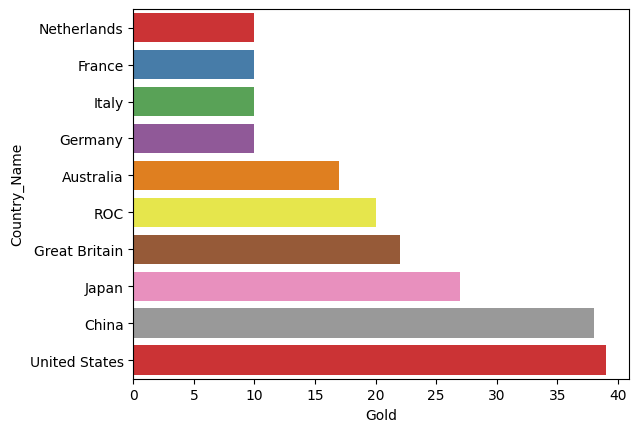

In [ ]:
sns.barplot(y='Country_Name', x='Gold' , data=medals_2020.sort_values(['Gold']),palette="Set1")

/tmp/ipython-input-132113327.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Silver' , data=medals_2020.sort_values(['Silver']),palette="Set1")


<Axes: xlabel='Silver', ylabel='Country_Name'>

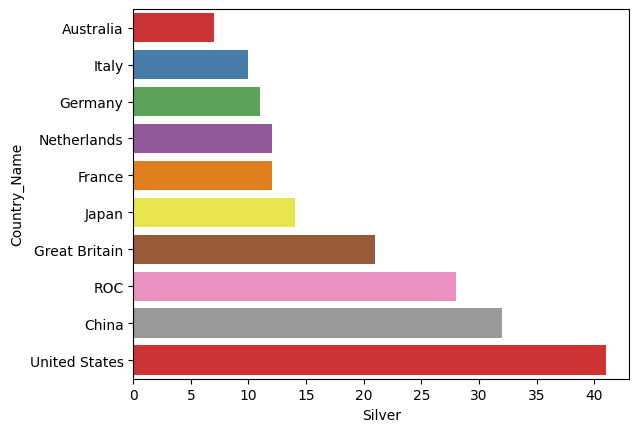

In [ ]:
sns.barplot(y='Country_Name', x='Silver' , data=medals_2020.sort_values(['Silver']),palette="Set1")

/tmp/ipython-input-3152765846.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Bronze' , data=medals_2020.sort_values(['Bronze']),palette="Set1")


<Axes: xlabel='Bronze', ylabel='Country_Name'>

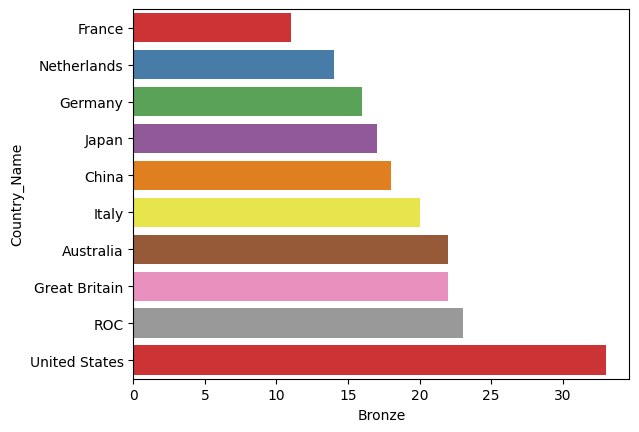

In [ ]:
sns.barplot(y='Country_Name', x='Bronze' , data=medals_2020.sort_values(['Bronze']),palette="Set1")

/tmp/ipython-input-1884908696.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country_Name', x='Total' , data=medals_2020.sort_values(['Total']),palette="Set1")


<Axes: xlabel='Total', ylabel='Country_Name'>

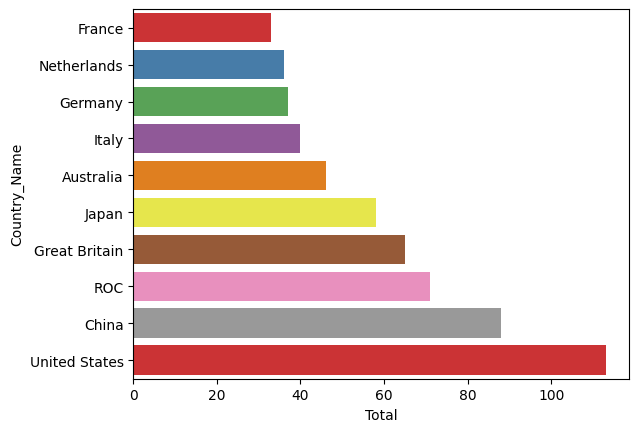

In [ ]:
sns.barplot(y='Country_Name', x='Total' , data=medals_2020.sort_values(['Total']),palette="Set1")

Thank you very much